## Contexte et objectifs

En 2004, Mark Zuckerberg crée Facebook. A la mi-2008, le réseau social dépasse les 100 millions d'utilisateurs. Et en 2010, le fondateur de Facebook est élu personnalité de l'année par le magazine Times, notamment pour le rôle du réseau social dans l'emergence et la diffusion des Printemps Arabes. Depuis, d'autres réseaux sociaux, comme Instagram et Twitter (X aujourd'hui) sont se sont développés, et sont devenus une part intégrante non seulement de notre société... mais surtout de la vie quotidienne des individus qui la composent !

Depuis, les réseaux sociaux sont parfois associés à la dégradation de la santé mentale des adolescents, à la diminution de l'estime de soi chez les adolescentes, à plus de dépression et d'anxiété ; sans pour autant que des liens de causalités soient clairement établis.

Alors, quels liens pouvons-nous établir entre l'utilisation des réseaux sociaux et les émotions dominantes au cours de la journée ? Pouvons-nous prévoir l'émotion dominante suivant les données sociodémographiques et l'utilisation des réseaux sociaux ? Pouvons-nous catégoriser les différents types d'usages des réseaux sociaux, et en déduire leur émotion dominante ?

Pour répondre à ces interrogations, Emirhan Bulut a collecté des données en envoyant des questionnaires où les individus devaient décrire leur utilisation des réseaux sociaux au cours de leur journée ainsi que leur émotion dominante.

Quelques informations supplémentaires sur la méthodologie de reccueil :
- Age : 20 à 36 ans
- Localisation : monde entier
- Dates d'interrogation : du 15 février au 23 mai 2024
- Données propriétaires du MIT, en libre-service sur le site Kaggle

Durant notre projet de recherche, nous passerons par plusieurs étapes :
1. Import et nettoyage des données
2. Qualité des données
3. Datavisualition
4. Preprocessing
5. Modèle
6. Clusters

## 1. Import et nettoyages

### a. Jeu d'entrainement

In [4]:
#Import et premières lignes du tableau

import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
train.head()

User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0       1  25      Female  Instagram                       120.0   
1       2  30        Male    Twitter                        90.0   
2       3  22  Non-binary   Facebook                        60.0   
3       4  28      Female  Instagram                       200.0   
4       5  33        Male   LinkedIn                        45.0   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0            3.0                    45.0                       10.0   
1            5.0                    20.0                       25.0   
2            2.0                    15.0                        5.0   
3            8.0                   100.0                       30.0   
4            1.0                     5.0                        2.0   

   Messages_Sent_Per_Day Dominant_Emotion  
0                   12.0        Happiness  
1                   30.0            Anger  
2                   20.0          Neutral  
3                   50.0          Anxiety  
4                   10.0          Boredom

In [5]:
#Premières descriptions du jeu de données

display(train.describe())

print(train.info())

print("\nA regarder : une valeur manquante ")


Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
count                 1000.000000    1000.000000             1000.000000   
mean                    95.950000       3.321000               39.898000   
std                     38.850442       1.914582               26.393867   
min                     40.000000       1.000000                5.000000   
25%                     65.000000       2.000000               20.000000   
50%                     85.000000       3.000000               33.000000   
75%                    120.000000       4.000000               55.000000   
max                    200.000000       8.000000              110.000000   

       Comments_Received_Per_Day  Messages_Sent_Per_Day  
count                1000.000000            1000.000000  
mean                   15.611000              22.560000  
std                     8.819493               8.516274  
min                     2.000000               8.000000  
25%                     8.000000              17.750000  
50%                    14.000000              22.000000  
75%                    22.000000              28.000000  
max                    40.000000              50.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB
None

A regarder : une valeur manquante 


In [6]:
#Gestion des valeurs manquantes

print("Regardons d'où provient la valeur manquante :")

display(train.loc[train.Gender.isna()])
       
print("Un utilisateur pour lequel nous n'avons pas l'information : à supprimer")

#Suppression de la ligne avec la valeur manquante

train = train.dropna(how = "any", subset = "Gender")

#Vérification

print(train.shape)

Regardons d'où provient la valeur manquante :


User_ID                                                Age Gender  \
641   Tabii   işte mevcut veri kümesini 1000 satıra tamamlı...    NaN   

    Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
641      NaN                         NaN            NaN   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
641                     NaN                        NaN                    NaN   

    Dominant_Emotion  
641              NaN

Un utilisateur pour lequel nous n'avons pas l'information : à supprimer
(1000, 10)


In [7]:
#Gestion des lignes duppliquées

print("Nombre de duppliqués :", train.duplicated().sum())

print("Nombre de duppliqués au niveau de l'ID :", train["User_ID"].duplicated().sum())

print("Les utilisateurs sont bien des utilisateurs uniques.")

#Vu que l'utilisation des réseaux sociaux se fait tous les jours, je souhaitais vérifier que les utilisateurs soient bien uniques

Nombre de duppliqués : 0
Nombre de duppliqués au niveau de l'ID : 0
Les utilisateurs sont bien des utilisateurs uniques.


### b. Jeux de test et de validation

In [9]:
#Jeu d'entrainement

#Import et premier apperçu
test = pd.read_csv("test.csv")
display(test.head())

#Description rapide
display(test.describe())
print(test.info())

#Vérification des duplicatats
print("Nombre de duppliqués :", test.duplicated().sum())
print("Nombre de duppliqués au niveau de l'ID :", test["User_ID"].duplicated().sum())

User_ID Age      Gender  Platform  Daily_Usage_Time (minutes)  \
0      500  27      Female  Snapchat                         120   
1      488  21  Non-binary  Snapchat                          60   
2      776  28  Non-binary  Snapchat                         115   
3      869  27        Male  Telegram                         105   
4      573  21  Non-binary  Facebook                          55   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              4                      40                         18   
1              1                      18                          7   
2              3                      38                         18   
3              3                      48                         20   
4              3                      17                          7   

   Messages_Sent_Per_Day Dominant_Emotion  
0                     22          Neutral  
1                     12          Neutral  
2                     27          Anxiety  
3                     28          Anxiety  
4                     12          Neutral

User_ID  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  103.000000                  103.000000     103.000000   
mean   521.262136                   88.009709       2.864078   
std    288.949991                   33.979087       1.732326   
min     16.000000                   40.000000       1.000000   
25%    275.000000                   60.000000       1.000000   
50%    526.000000                   75.000000       2.000000   
75%    776.000000                  105.000000       4.000000   
max    997.000000                  200.000000       8.000000   

       Likes_Received_Per_Day  Comments_Received_Per_Day  \
count              103.000000                 103.000000   
mean                33.456311                  13.766990   
std                 23.031426                   8.107372   
min                  5.000000                   2.000000   
25%                 15.000000                   7.000000   
50%                 27.000000                  12.000000   
75%                 40.000000                  19.500000   
max                110.000000                  40.000000   

       Messages_Sent_Per_Day  
count             103.000000  
mean               20.388350  
std                 7.372755  
min                10.000000  
25%                15.000000  
50%                20.000000  
75%                25.000000  
max                45.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    object
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(4)
memory usage: 8.2+ KB
None
Nombre de duppliqués : 4
Nombre de duppliqués au niveau de l'ID : 5


Il n'y a pas de valeurs manquantes mais un certain nombre de duppliqués. Remédions à cela.

In [11]:
test = test.drop_duplicates()
test = test.drop_duplicates(subset = "User_ID")

print("Nombre de duppliqués :", test.duplicated().sum())
print("Nombre de duppliqués au niveau de l'ID :", test["User_ID"].duplicated().sum())

Nombre de duppliqués : 0
Nombre de duppliqués au niveau de l'ID : 0


In [12]:
#Jeu de validation

#Import et premier apperçu
val = pd.read_csv("val.csv", on_bad_lines='skip')
display(val.head())

#Description rapide
display(val.describe())
print(val.info())

#Vérification des duplicatats
print("Nombre de duppliqués :", val.duplicated().sum())
print("Nombre de duppliqués au niveau de l'ID :", val["User_ID"].duplicated().sum())

User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0       10  31        Male  Instagram                         170   
1      877  32      Female  Instagram                         155   
2      230  26  Non-binary   Facebook                          45   
3      876  28  Non-binary   Snapchat                         115   
4      376  28  Non-binary   Snapchat                         115   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              5                      80                         20   
1              6                      75                         25   
2              1                       8                          4   
3              3                      38                         18   
4              3                      38                         18   

  Messages_Sent_Per_Day Dominant_Emotion  
0                    35        Happiness  
1                    38        Happiness  
2                    12          Sadness  
3                    27          Anxiety  
4                    27          Anxiety

User_ID  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  145.000000                  145.000000     145.000000   
mean   484.613793                   95.137931       3.572414   
std    285.218805                   43.121376       2.146524   
min      5.000000                    1.000000       1.000000   
25%    233.000000                   60.000000       2.000000   
50%    472.000000                   85.000000       3.000000   
75%    745.000000                  120.000000       5.000000   
max    986.000000                  200.000000      10.000000   

       Likes_Received_Per_Day  Comments_Received_Per_Day  
count              145.000000                 145.000000  
mean                39.020690                  14.972414  
std                 26.639952                   8.298213  
min                  2.000000                   2.000000  
25%                 20.000000                   8.000000  
50%                 33.000000                  14.000000  
75%                 50.000000                  20.000000  
max                110.000000                  40.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     145 non-null    int64 
 1   Age                         145 non-null    object
 2   Gender                      145 non-null    object
 3   Platform                    145 non-null    object
 4   Daily_Usage_Time (minutes)  145 non-null    int64 
 5   Posts_Per_Day               145 non-null    int64 
 6   Likes_Received_Per_Day      145 non-null    int64 
 7   Comments_Received_Per_Day   145 non-null    int64 
 8   Messages_Sent_Per_Day       145 non-null    object
 9   Dominant_Emotion            144 non-null    object
dtypes: int64(5), object(5)
memory usage: 11.5+ KB
None
Nombre de duppliqués : 7
Nombre de duppliqués au niveau de l'ID : 14


In [13]:
#Supression des duplicatats
val = val.drop_duplicates()
val = val.drop_duplicates(subset = "User_ID")

print("Nombre de duppliqués :", val.duplicated().sum())
print("Nombre de duppliqués au niveau de l'ID :", val["User_ID"].duplicated().sum())

Nombre de duppliqués : 0
Nombre de duppliqués au niveau de l'ID : 0


## 2. Qualité des données

### a. Jeu d'entrainement

In [16]:
#La colonne âge est en format "objet" : à transformer en format numérique intégral
#Problème rencontré lors de la transformation

In [17]:
print("Un message d'erreur apparaît. Regardons les valeurs uniques :\n")

print(train["Age"].unique(), "\n")

print("Nous voyons la présence de données liées au sexe. Investiguons :")

Un message d'erreur apparaît. Regardons les valeurs uniques :

['25' '30' '22' '28' '33' '21' '27' '24' '29' '31' '23' '26' '34' '35'
 '32' 'Male' 'Female' 'Non-binary'] 

Nous voyons la présence de données liées au sexe. Investiguons :


In [18]:
train.loc[(train.Age == 'Male') | (train.Age == 'Female') | (train.Age == 'Non-binary')]

User_ID         Age Gender   Platform  Daily_Usage_Time (minutes)  \
250     251        Male     27  Instagram                       165.0   
251     252      Female     24    Twitter                        75.0   
252     253  Non-binary     29   Facebook                        85.0   
253     254      Female     33  Instagram                       145.0   
254     255        Male     31   LinkedIn                        60.0   
..      ...         ...    ...        ...                         ...   
784     784        Male     22    Twitter                        70.0   
785     785  Non-binary     29   Facebook                        75.0   
786     786      Female     28   Whatsapp                       100.0   
787     787        Male     31   Telegram                        85.0   
788     788  Non-binary     21   Snapchat                        60.0   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
250            6.0                    85.0                       30.0   
251            3.0                    33.0                       18.0   
252            2.0                    27.0                        9.0   
253            4.0                    65.0                       23.0   
254            1.0                    15.0                        7.0   
..             ...                     ...                        ...   
784            1.0                    22.0                        7.0   
785            2.0                    20.0                        8.0   
786            4.0                    37.0                       14.0   
787            3.0                    45.0                       20.0   
788            1.0                    18.0                        7.0   

     Messages_Sent_Per_Day Dominant_Emotion  
250                   28.0        Happiness  
251                   19.0            Anger  
252                   20.0          Neutral  
253                   35.0          Sadness  
254                   17.0          Anxiety  
..                     ...              ...  
784                   22.0          Neutral  
785                   20.0          Boredom  
786                   26.0          Anxiety  
787                   28.0          Sadness  
788                   12.0          Neutral  

[76 rows x 10 columns]

In [19]:
train.loc[(train.Gender != 'Male') & (train.Gender != 'Female') & (train.Gender != 'Non-binary')]

User_ID         Age Gender   Platform  Daily_Usage_Time (minutes)  \
250     251        Male     27  Instagram                       165.0   
251     252      Female     24    Twitter                        75.0   
252     253  Non-binary     29   Facebook                        85.0   
253     254      Female     33  Instagram                       145.0   
254     255        Male     31   LinkedIn                        60.0   
..      ...         ...    ...        ...                         ...   
784     784        Male     22    Twitter                        70.0   
785     785  Non-binary     29   Facebook                        75.0   
786     786      Female     28   Whatsapp                       100.0   
787     787        Male     31   Telegram                        85.0   
788     788  Non-binary     21   Snapchat                        60.0   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
250            6.0                    85.0                       30.0   
251            3.0                    33.0                       18.0   
252            2.0                    27.0                        9.0   
253            4.0                    65.0                       23.0   
254            1.0                    15.0                        7.0   
..             ...                     ...                        ...   
784            1.0                    22.0                        7.0   
785            2.0                    20.0                        8.0   
786            4.0                    37.0                       14.0   
787            3.0                    45.0                       20.0   
788            1.0                    18.0                        7.0   

     Messages_Sent_Per_Day Dominant_Emotion  
250                   28.0        Happiness  
251                   19.0            Anger  
252                   20.0          Neutral  
253                   35.0          Sadness  
254                   17.0          Anxiety  
..                     ...              ...  
784                   22.0          Neutral  
785                   20.0          Boredom  
786                   26.0          Anxiety  
787                   28.0          Sadness  
788                   12.0          Neutral  

[76 rows x 10 columns]

Les données sont inversées entre Age et Gender sur certaines lignes

Pour ne pas perdre de données, nous allons corriger ce problème

In [21]:
#Pour y remédier, nous allons isoler ces lignes-là dans un nouveau df :

train_modif = train.loc[(train.Gender != 'Male') & (train.Gender != 'Female') & (train.Gender != 'Non-binary')]

#Renommer les colonnes

train_modif = train_modif.rename(columns = {"Age" : "Gender", "Gender" : "Age"})

#supprimer les colonnes

train_copy = train.copy() #A faire sur une copie du df

train_copy = train_copy.drop(train_modif.index) #Suppression selon les indices de train_modif

#Ajout df où les modifications ont été executées

train_concat = pd.concat([train_copy, train_modif])

#Trier selon l'index

train_concat = train_concat.sort_index()

User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0          1  25      Female  Instagram                       120.0   
1          2  30        Male    Twitter                        90.0   
2          3  22  Non-binary   Facebook                        60.0   
3          4  28      Female  Instagram                       200.0   
4          5  33        Male   LinkedIn                        45.0   
...      ...  ..         ...        ...                         ...   
996      996  33  Non-binary    Twitter                        85.0   
997      997  22      Female   Facebook                        70.0   
998      998  35        Male   Whatsapp                       110.0   
999      999  28  Non-binary   Telegram                        60.0   
1000    1000  27      Female   Snapchat                       120.0   

      Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0               3.0                    45.0                       10.0   
1               5.0                    20.0                       25.0   
2               2.0                    15.0                        5.0   
3               8.0                   100.0                       30.0   
4               1.0                     5.0                        2.0   
...             ...                     ...                        ...   
996             4.0                    35.0                       18.0   
997             1.0                    14.0                        6.0   
998             3.0                    50.0                       25.0   
999             2.0                    18.0                        8.0   
1000            4.0                    40.0                       18.0   

      Messages_Sent_Per_Day Dominant_Emotion  
0                      12.0        Happiness  
1                      30.0            Anger  
2                      20.0          Neutral  
3                      50.0          Anxiety  
4                      10.0          Boredom  
...                     ...              ...  
996                    18.0          Boredom  
997                    10.0          Neutral  
998                    25.0        Happiness  
999                    18.0            Anger  
1000                   22.0          Neutral  

[1000 rows x 10 columns]

In [22]:
print("Vérifions que les modifications ont été apportées", "\n")

print("Valeurs uniques de la variable Age :", train_concat["Age"].unique())
print("Valeurs uniques de la variable Gender :", train_concat["Gender"].unique())

Vérifions que les modifications ont été apportées 

Valeurs uniques de la variable Age : ['25' '30' '22' '28' '33' '21' '27' '24' '29' '31' '23' '26' '34' '35'
 '32']
Valeurs uniques de la variable Gender : ['Female' 'Male' 'Non-binary']




L'inversion des valeurs a fonctionné. Nous pouvons reprendre les transformations.

In [24]:
train = train_concat

#Mettre l'âge en format numérique intégrale et l'User_ID en format objet
train["Age"] = train["Age"].astype(int)
train["User_ID"] = train["User_ID"].astype(object)



Opérons maintenant les transformations sur les dataframes test et val.

Sur le Dataframe "train", nous avions eu des problèmes sur les colonnes Age et Gender. Vérifions sur le dataframe test :

In [26]:
test["Age"].unique()

print("Présence anormale de 'Male'")

Présence anormale de 'Male'


In [27]:
test["Age"].loc[test["Age"] == "Male"]

46    Male
Name: Age, dtype: object

In [28]:
test["Gender"].unique()

array(['Female', 'Non-binary', 'Male', '27', 'Marie'], dtype=object)

In [ ]:
test["Gender"].loc[(test["Gender"] == "Marie") | (test["Gender"] == "27")]

In [29]:
print("Présence anormale : 27 et Marie")

Présence anormale : 27 et Marie


In [30]:
#Les problèmes concernent uniquement 2 lignes : nous pouvons les supprimer

test = test.drop([46, 79])

#Vérification
print(test["Age"].unique())
print(test["Gender"].unique())


['27' '21' '28' '25' '24' '33' '32' '23' '35' '31' '34' '29' '22' '26'
 '30']
['Female' 'Non-binary' 'Male']


In [31]:
#Mettre l'âge en format numérique intégrale et l'User_ID en format objet

test["User_ID"] = test["User_ID"].astype(object)
test["Age"] = test["Age"].astype(int)


Mêmes vérifications pour le dataframe val :

In [33]:
val["Age"].unique()

array(['31', '32', '26', '28', '35', '25', '27', '24', '33', 'Female',
       '29', '21', '23', '34', '22', 'Male', 'Non-binary'], dtype=object)

In [34]:
val.loc[(val.Age == 'Male') | (val.Age == 'Female') | (val.Age == 'Non-binary')]

User_ID         Age    Gender   Platform  Daily_Usage_Time (minutes)  \
14       752      Female        24    Twitter                          75   
57       537      Female        33   Snapchat                         190   
59       683      Female        34  Instagram                         105   
60       372        Male        28    Twitter                         100   
63       352      Female        24    Twitter                          72   
65       590        Male        28   Facebook                          40   
68        13        Male        34  Instagram                          75   
70       613      Female        22   LinkedIn                          90   
75       524      Female        26  Instagram                          90   
76       105        Male        33   LinkedIn                          30   
77       622      Female        24    Twitter                          85   
91        27  Non-binary  Facebook         55                           1   
100      756      Female        22   Whatsapp                          70   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
14               3                      33                         18   
57               7                      82                         21   
59               7                      42                         16   
60               4                      23                         19   
63               3                      42                         19   
65               6                      21                         11   
68               6                      30                         11   
70              10                      12                          5   
75               3                      39                         10   
76               1                      10                          9   
77               6                      42                         15   
91               9                       2                         11   
100              2                      42                         10   

    Messages_Sent_Per_Day Dominant_Emotion  
14                     19            Anger  
57                     28        Happiness  
59                     31            Anger  
60                     20          Neutral  
63                     40            Anger  
65                     15          Anxiety  
68                     23          Sadness  
70                     11          Neutral  
75                     21          Neutral  
76                     14          Boredom  
77                     21          Boredom  
91                Anxiety              NaN  
100                    21          Anxiety

In [35]:
val["Gender"].unique()

array(['Male', 'Female', 'Non-binary', '24', '33', '34', '28', '22', '26',
       'Facebook'], dtype=object)

In [36]:
val.loc[(val.Gender != 'Male') & (val.Gender != 'Female') & (val.Gender != 'Non-binary')]

User_ID         Age    Gender   Platform  Daily_Usage_Time (minutes)  \
14       752      Female        24    Twitter                          75   
57       537      Female        33   Snapchat                         190   
59       683      Female        34  Instagram                         105   
60       372        Male        28    Twitter                         100   
63       352      Female        24    Twitter                          72   
65       590        Male        28   Facebook                          40   
68        13        Male        34  Instagram                          75   
70       613      Female        22   LinkedIn                          90   
75       524      Female        26  Instagram                          90   
76       105        Male        33   LinkedIn                          30   
77       622      Female        24    Twitter                          85   
91        27  Non-binary  Facebook         55                           1   
100      756      Female        22   Whatsapp                          70   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
14               3                      33                         18   
57               7                      82                         21   
59               7                      42                         16   
60               4                      23                         19   
63               3                      42                         19   
65               6                      21                         11   
68               6                      30                         11   
70              10                      12                          5   
75               3                      39                         10   
76               1                      10                          9   
77               6                      42                         15   
91               9                       2                         11   
100              2                      42                         10   

    Messages_Sent_Per_Day Dominant_Emotion  
14                     19            Anger  
57                     28        Happiness  
59                     31            Anger  
60                     20          Neutral  
63                     40            Anger  
65                     15          Anxiety  
68                     23          Sadness  
70                     11          Neutral  
75                     21          Neutral  
76                     14          Boredom  
77                     21          Boredom  
91                Anxiety              NaN  
100                    21          Anxiety

Nous pouvons effectuer la même opération pour inverser les colonnes que sur le dataframe train. Mais avant, nous devons supprimer la ligne où 'Facebook' est présent dans la colonne 'genre'.

In [38]:
#Suppression des lignes mal remplies

val.loc[val["Gender"] == "Facebook", "Gender"] = np.nan
val.loc[val['Dominant_Emotion'] == "Agression", 'Dominant_Emotion'] = np.nan #Seul mention d'agression dans tous les dataframes
val = val.dropna(how = "any")

#Vérification
print(val.isna().sum())
print(val.shape)

In [41]:
#Création d'un df contenant les lignes où les colonnes ont été inversées. :

val_modif = val.loc[(val.Gender != 'Male') & (val.Gender != 'Female') & (val.Gender != 'Non-binary')]

#Renommer les colonnes

val_modif = val_modif.rename(columns = {"Age" : "Gender", "Gender" : "Age"})

#supprimer les colonnes

val_copy = val.copy() #A faire sur une copie du df
val_copy = val_copy.drop(val_modif.index) #Suppression des lignes de val_modif

#Ajout df où les modifications ont été executées

val_concat = pd.concat([val_copy, val_modif])

#Trier selon l'index

val_concat = val_concat.sort_index()

User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0         10  31        Male  Instagram                         170   
1        877  32      Female  Instagram                         155   
2        230  26  Non-binary   Facebook                          45   
3        876  28  Non-binary   Snapchat                         115   
4        376  28  Non-binary   Snapchat                         115   
..       ...  ..         ...        ...                         ...   
140      277  27  Non-binary   LinkedIn                          55   
141      830  26  Non-binary   Facebook                          45   
142      109  29      Female   LinkedIn                          55   
143       99  21      Female   Facebook                          75   
144      493  24      Female  Instagram                         200   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0                5                      80                         20   
1                6                      75                         25   
2                1                       8                          4   
3                3                      38                         18   
4                3                      38                         18   
..             ...                     ...                        ...   
140              1                       9                          2   
141              1                       8                          4   
142              2                      15                          5   
143              2                      25                         13   
144              6                     100                         18   

    Messages_Sent_Per_Day Dominant_Emotion  
0                      35        Happiness  
1                      38        Happiness  
2                      12          Sadness  
3                      27          Anxiety  
4                      27          Anxiety  
..                    ...              ...  
140                    11          Anxiety  
141                    12          Sadness  
142                    10          Neutral  
143                    19          Anxiety  
144                    39          Neutral  

[129 rows x 10 columns]

In [42]:
#Transformations
val = val_concat

val["Age"] = val["Age"].astype(int)
val["User_ID"] = val["User_ID"].astype(object)

#Vérification
print(val.isna().sum())
print(val['Dominant_Emotion'].unique())


## 3. Datavisualisation

### a. Analyse des variables catégorielles

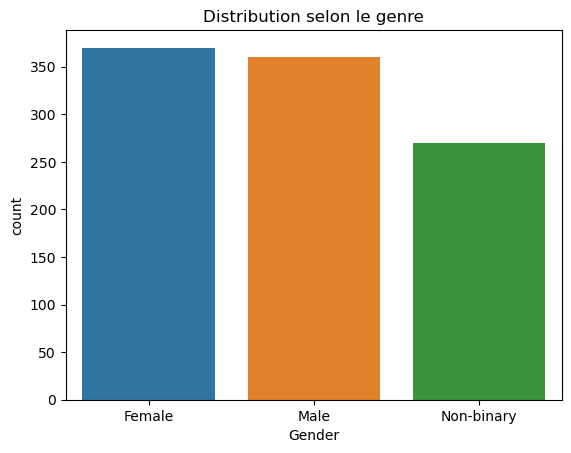

Un équilibre entre hommes et femmes, légèrement moins de non-binaires


In [48]:
#Import des librairies nécessaires à la datavisualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.countplot(x = train["Gender"])
plt.title("Distribution selon le genre")
plt.show();

print("Un équilibre entre hommes et femmes, légèrement moins de non-binaires")

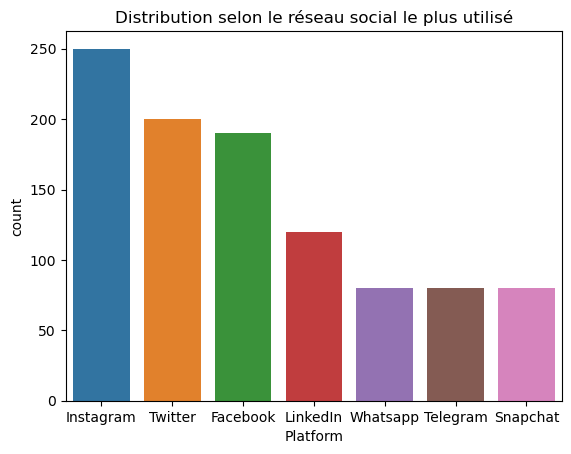

Instagram est le réseau social le plus utilisé, suivi de Twitter et Facebook


In [49]:
sns.countplot(x = train["Platform"])
plt.title("Distribution selon le réseau social le plus utilisé")
plt.show();

print("Instagram est le réseau social le plus utilisé, suivi de Twitter et Facebook")

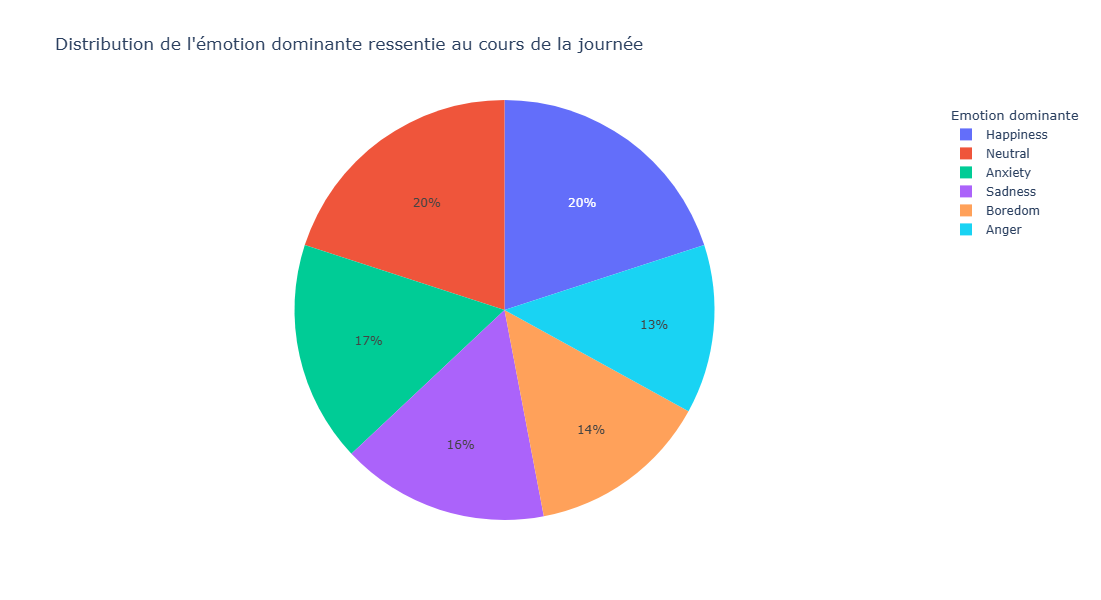

Plus de bonheur et de neutralité ressenties durant la journée. La colère et l'ennuie sont des émotions en retrait.


In [50]:
p = train["Dominant_Emotion"].unique()
poccurence = []
for i in range(len(p)):
    poccurence.append(train.loc[train["Dominant_Emotion"] == p[i]].count()[0])    

fig = go.Figure()
fig.add_trace(go.Pie(labels=p, values=poccurence, pull = [0, 0, 0, 0, 0, 0, 0], 
                     legendgroup = "Emotion dominante", legendgrouptitle_text = "Emotion dominante"))
fig.update_layout(title = "Distribution de l'émotion dominante ressentie au cours de la journée",
                 autosize=False, width=600, height=600)
fig.show()

print("Plus de bonheur et de neutralité ressenties durant la journée. La colère et l'ennui sont des émotions en retrait.")

### b. Analyse des variables quantitatives

C:\Users\cleme\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



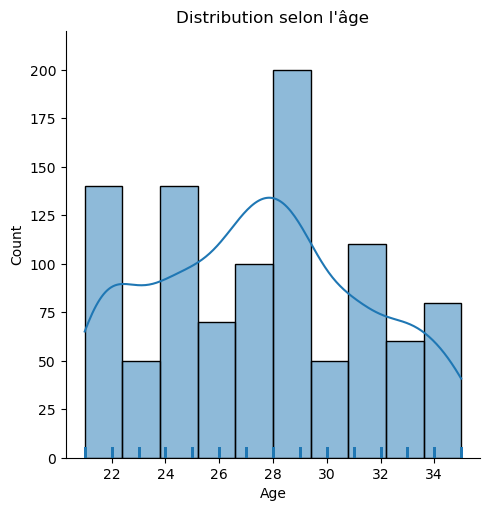

Une variété de jeunes de 20 à 35 ans, avec une forte proportion d'individus qui ont 29 ans. Pour plus de lisibilité, à changer en catégories.


In [52]:
sns.displot(train['Age'], kde = True, rug = True, bins = 10)
plt.title("Distribution selon l'âge")
plt.show();

print("Une variété de jeunes de 20 à 35 ans, avec une forte proportion d'individus qui ont 29 ans.")

C:\Users\cleme\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



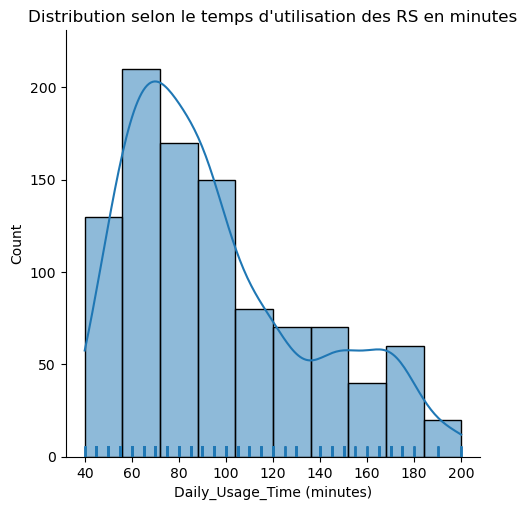

Un temps d'utilisation plutôt concentré sur les utilisations de moins de 100 minutes. Mais une part non négligeable l'utilise plus de 100 minutes
Il serait intéressant de mesurer l'impact sur les émotions ressenties de ces derniers


In [53]:
sns.displot(train['Daily_Usage_Time (minutes)'], kde = True, rug = True, bins = 10)
plt.title("Distribution selon le temps d'utilisation du réseaux social principal en minutes")
plt.show();

print("Un temps d'utilisation plutôt concentré sur les utilisations de moins de 100 minutes. Mais une part non négligeable l'utilise plus de 100 minutes")
print("Il serait intéressant de mesurer l'impact sur les émotions ressenties de ces derniers.")


C:\Users\cleme\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



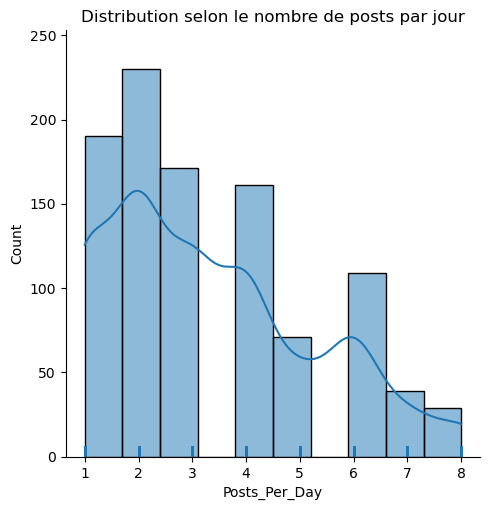

Une distribution similaire à la temps d'utilisation, bien que moins accentué.
A noter : nous ne sommes que sur des utilisateurs actifs, qui postent.


In [54]:
sns.displot(train['Posts_Per_Day'], kde = True, rug = True, bins = 10)
plt.title("Distribution selon le nombre de posts par jour")
plt.show();

print("Une distribution similaire au temps d'utilisation, bien que moins accentué.")
print("A noter : nous ne sommes que sur des utilisateurs actifs, qui postent.")

C:\Users\cleme\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



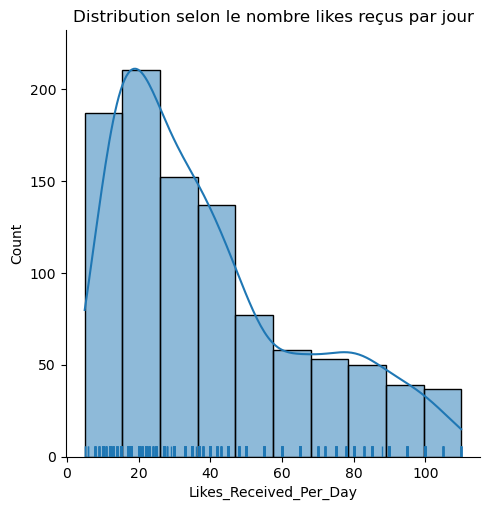

Cette-fois-ci, la distribution est similaire au temps passé par jour : nous observons une forte baisse à partir de 45 likes par jour.


In [55]:
sns.displot(train['Likes_Received_Per_Day'], kde = True, rug = True, bins = 10)
plt.title("Distribution selon le nombre likes reçus par jour")
plt.show();

print("Cette-fois-ci, la distribution est similaire au temps passé par jour : nous observons une forte baisse à partir de 45 likes par jour.")

C:\Users\cleme\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



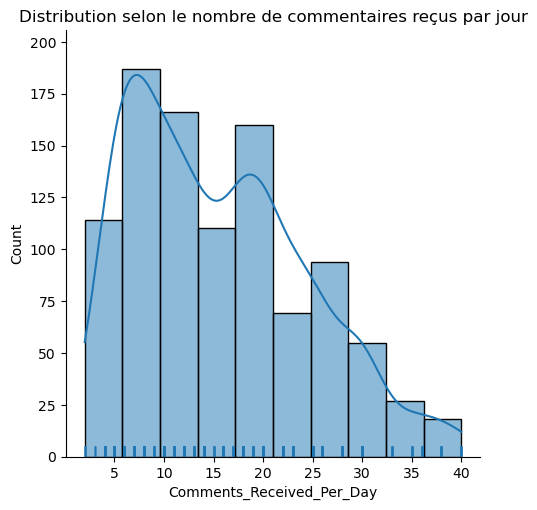

Une grande majorité reçoit entre 5 et 21 commentaires par jour.


In [56]:
sns.displot(train['Comments_Received_Per_Day'], kde = True, rug = True, bins = 10)
plt.title("Distribution selon le nombre de commentaires reçus par jour")
plt.show();

print("Une grande majorité reçoit entre 5 et 21 commentaires par jour.")

C:\Users\cleme\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



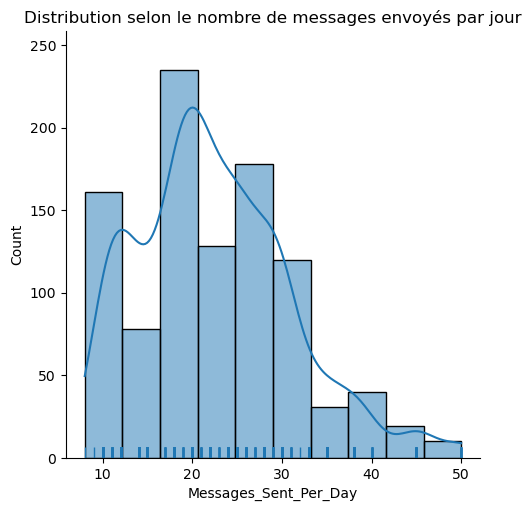

Une grande majorité reçoit entre 5 et 21 commentaires par jour.


In [57]:
sns.displot(train['Messages_Sent_Per_Day'], kde = True, rug = True, bins = 10)
plt.title("Distribution selon le nombre de messages envoyés par jour")
plt.show();

print("Une grande majorité envoie entre 7 et 35 commentaires par jour.")

### c. Vérification des valeurs extrêmes/aberrantes des variables quantitatives

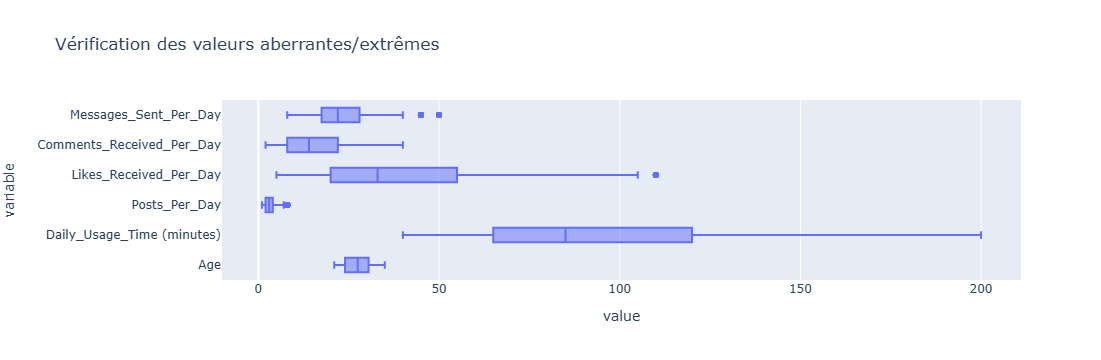

In [59]:
train_num = ["Age", "Daily_Usage_Time (minutes)", "Posts_Per_Day", "Likes_Received_Per_Day", "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]

fig = px.box(data_frame = train, x=train_num, title = "Vérification des valeurs aberrantes/extrêmes")
fig.show()

S'il y a quelques valeurs extrêmes, elles ne sont pas du tout aberrantes. Nous n'avons donc pas besoin de faire de modifications dessus.

### d. Relation des variables catégorielles à la variable cible

Le but de cette recherche est de comprendre la manière dont l'utilisation des réseaux sociaux influence les émotions ressenties au cours de la journée. Regardons d'abord la façon dont les variables catégorielles influencent la variable cible (les émotions).

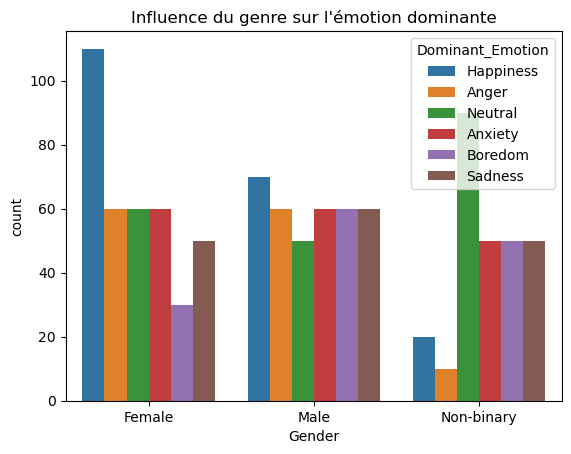

Les femmes ont plus tendance à se sentir heureuses et moins ennuyées, alors que les hommes ont des émotions relativement équilibrées.
Les non-binaires, eux, se sentent nettement plus neutres, et beaucoup moins heureux ou en colère.


In [63]:
sns.countplot(x = train["Gender"], hue = train["Dominant_Emotion"])
plt.title("Influence du genre sur l'émotion dominante")
plt.show();

print("Les femmes ont plus tendance à se sentir heureuses et moins ennuyées, alors que les hommes ont des émotions relativement équilibrées.")
print("Les non-binaires, eux, se sentent nettement plus neutres, et beaucoup moins heureux ou en colère.")

In [64]:
print("Confirmons avec un test du khi²")

cross_tab = pd.crosstab(train["Gender"], train["Dominant_Emotion"])
print("Hypothèses")
print("H0 : l'émotion dominante est indépendante du genre")
print("H1 : l'émotion dominante est dépendante du genre \n")

from scipy.stats import chi2_contingency #importation du module pour le test du khi²

test_chi2 = chi2_contingency(cross_tab)

print("p-valeur :", test_chi2[1], "< 0.05, donc l'hypothèse 0 est rejetée et l'hypothèse 1 est acceptée.")
print("Donc l'émotion dominante est dépendante du genre.")

Confirmons avec un test du khi²
Hypothèses
H0 : l'émotion dominante est indépendante du genre
H1 : l'émotion dominante est dépendante du genre 

p-valeur : 5.1481290400345965e-20 < 0.05, donc l'hypothèse 0 est rejetée et l'hypothèse 1 est acceptée.
Donc l'émotion dominante est dépendante du genre.


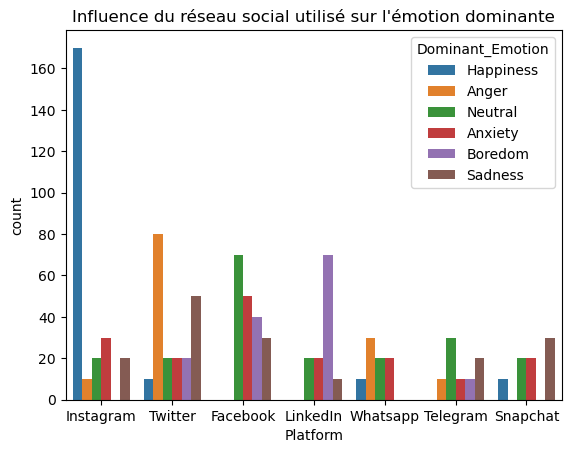

Le réseau social le plus utilisé a une influence massive sur l'émotion dominante de la journée :
- Instagram est lié très fortement au sentiment de bonheur
- Twitter a un lien de son côté avec deux émotions plus 'négatives' comme la colère et la tristesse
- Facebook est un réseau social plus neutre
- Linkedin est plus lié à l'ennui


In [65]:
sns.countplot(x = train["Platform"], hue = train["Dominant_Emotion"])
plt.title("Influence du réseau social utilisé sur l'émotion dominante")
plt.show();

print("Le réseau social le plus utilisé a une influence massive sur l'émotion dominante de la journée :")
print("- Instagram est lié très fortement au sentiment de bonheur")
print("- Twitter a un lien de son côté avec deux émotions plus 'négatives' comme la colère et la tristesse")
print("- Facebook est un réseau social plus neutre")
print("- Linkedin est plus lié à l'ennui")

In [66]:
print("Confirmons avec un test du khi²")

cross_tab = pd.crosstab(train["Platform"], train["Dominant_Emotion"])
print("Hypothèses")
print("H0 : l'émotion dominante est indépendante du réseau social le plus utilisé")
print("H1 : l'émotion dominante est dépendante du réseau social le plus utilisé \n")

test_chi2 = chi2_contingency(cross_tab)

print("p-valeur :", test_chi2[1], "< 0.05, donc l'hypothèse 0 est rejetée et l'hypothèse 1 est acceptée.")
print("Donc l'émotion dominante est dépendante de la plateforme utilisée.")

Confirmons avec un test du khi²
Hypothèses
H0 : l'émotion dominante est indépendante du réseau social le plus utilisé
H1 : l'émotion dominante est dépendante du réseau social le plus utilisé 

p-valeur : 7.686476515335924e-192 < 0.05, donc l'hypothèse 0 est rejetée et l'hypothèse 1 est acceptée.
Donc l'émotion dominante est dépendante de la plateforme utilisée.


Pour aller plus loin, il est intéressant de regarder quels sont les réseaux qui sont les plus utilisés selon le genre.

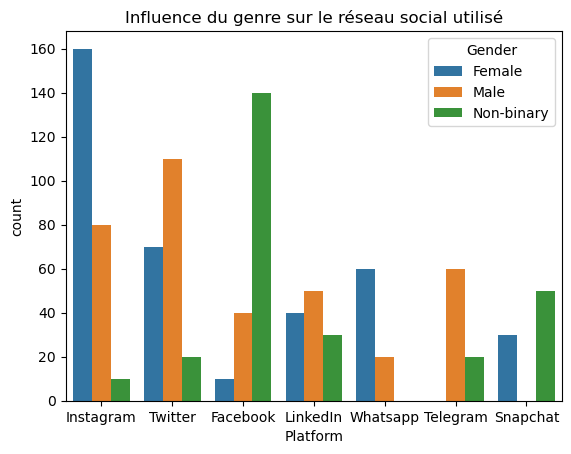

Les femmes sont plus nombreuses à utiliser le plus instagram, alors que Twitter est plus utilisé chez les hommes. Facebook est plus utilisé par les non-binaires.


In [68]:
sns.countplot(x = train["Platform"], hue = train["Gender"])
plt.title("Influence du genre sur le réseau social utilisé")
plt.show();

print("Les femmes sont plus nombreuses à utiliser le plus instagram, alors que Twitter est plus utilisé chez les hommes. Facebook est plus utilisé par les non-binaires.")

e. Relation des variables numériques à la variable cible

In [70]:
#Variables numériques affichées dans le graphique suivant.

train[train_num]

Age  Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
0     25                       120.0            3.0                    45.0   
1     30                        90.0            5.0                    20.0   
2     22                        60.0            2.0                    15.0   
3     28                       200.0            8.0                   100.0   
4     33                        45.0            1.0                     5.0   
..   ...                         ...            ...                     ...   
784   22                        70.0            1.0                    22.0   
785   29                        75.0            2.0                    20.0   
786   28                       100.0            4.0                    37.0   
787   31                        85.0            3.0                    45.0   
788   21                        60.0            1.0                    18.0   

     Comments_Received_Per_Day  Messages_Sent_Per_Day  
0                         10.0                   12.0  
1                         25.0                   30.0  
2                          5.0                   20.0  
3                         30.0                   50.0  
4                          2.0                   10.0  
..                         ...                    ...  
784                        7.0                   22.0  
785                        8.0                   20.0  
786                       14.0                   26.0  
787                       20.0                   28.0  
788                        7.0                   12.0  

[1000 rows x 6 columns]

C:\Users\cleme\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



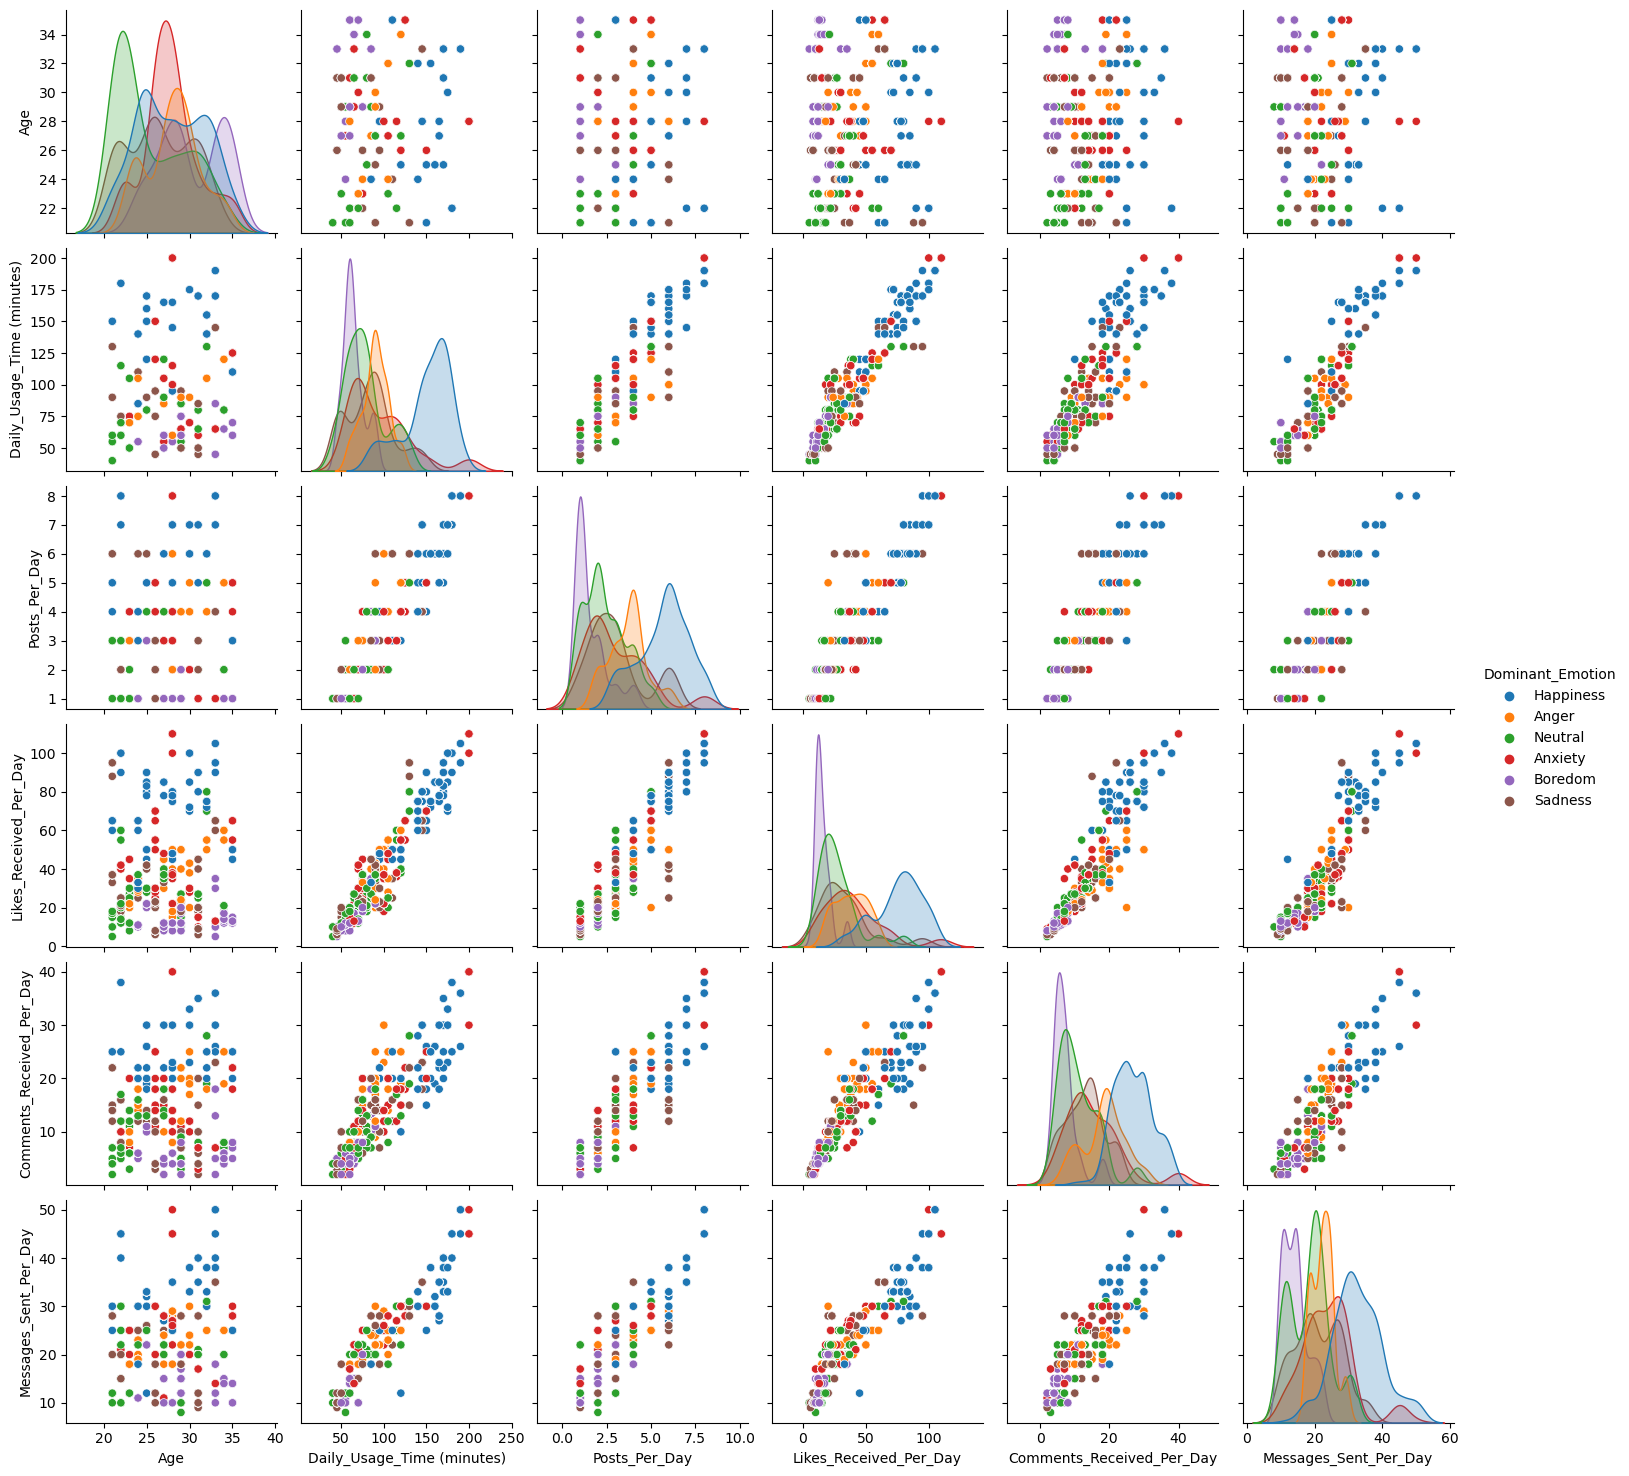

In [71]:
sns.pairplot(data = train[["Age", "Daily_Usage_Time (minutes)", "Posts_Per_Day", "Likes_Received_Per_Day", "Comments_Received_Per_Day", "Messages_Sent_Per_Day","Dominant_Emotion"]], diag_kind = 'kde', hue = "Dominant_Emotion");

Ce graphique est très riche en enseignements.

Tout d'abord, nous remarquons que, selon l'âge, les émotions dominantes sont différentes, pouvant être lié à des moments de vie :
- Les plus jeunes, début vingtaine, se sentent plus neutres et très peu ennuyés
- L'anxiété est plus prononcée entre 27 ans et 30 ans.
- La colère connaît un pic à 29 ans.
- Les autres émotions sont moins prononcées : le bonheur connaît un léger pic à 25 ans, l'ennui à 30 ans.

En revanche, l'âge ne semble pas influencer les manières d'utiliser les réseaux sociaux.

Les mêmes grandes tendances se dégagent de toutes les variables liées à l'utilisation des réseaux sociaux. Les utilisateurs les plus fréquents se sentent plus heureux au cours de la journée, au contraire des petits utilisateurs, qui se déclarent plus ennuyés. Les "neutres" ont aussi tendance à moins utiliser les réseaux sociaux. Les anxieux et les tristes, quant-à-eux, suivent généralement l'utilisation moyenne. Mais, selon le type d'interaction avec les réseaux sociaux, des différences se dessinent autour du sentiment de colère :
- Sur le temps passé sur le RS préféré, un pic prononcé de colère se dessine autour d'une heure et demie d'utilisation par jour
- Sur le nombre de posts publiés, ce pic se situe à 3 posts.
- Sur le nombre likes reçu, nous n'observons pas vraiment de pic. Globalement, sur cette variable, les différences sont peu marquées.
- Sur le nombre de commentaires reçus, un léger pic a lieu à 20 commentaires. Globalement, les différences sont accentuées sur cette variable.

Enfin, la variable sur les messages envoyés par jour semble suivre les mêmes tendances générales que les variables liées à l'activité sur les réseaux sociaux.

In [74]:
print("Vérifions maintenant la validité des constats via des tests statistiques ANOVA")

import statsmodels.api #Import de la librairie 

#Age

print("Hypothèses")
print("H0 : l'âge n'a pas d'influence significative sur les émotions dominantes")
print("H1 : l'âge a une influence significative sur les émotions dominantes \n")

result = statsmodels.formula.api.ols('Age ~ Dominant_Emotion', data=train).fit()
table = statsmodels.api.stats.anova_lm(result)

display(table) #Afficher les résultats du test

print("p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :" \
      "l'âge a une influence significative sur les émotions dominantes")



Vérifions maintenant la validité des constats via des tests statistiques ANOVA
Hypothèses
H0 : l'âge n'a pas d'influence significative sur les émotions dominantes
H1 : l'âge a une influence significative sur les émotions dominantes 



df        sum_sq     mean_sq          F        PR(>F)
Dominant_Emotion    5.0   2071.320491  414.264098  30.825022  3.229700e-29
Residual          994.0  13358.579509   13.439215        NaN           NaN

p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :l'âge a une influence significative sur les émotions dominantes


In [76]:
#Temps d'utilisation

#Modification nécessaire pour pouvoir réaliser le test
train = train.rename(columns = {"Daily_Usage_Time (minutes)" : "Daily_Usage_Time_min"})

print("Hypothèses")
print("H0 : le temps d'utilisation n'a pas d'influence significative sur les émotions dominantes")
print("H1 : le temps d'utilisation a une influence significative sur les émotions dominantes \n")

result = statsmodels.formula.api.ols('Daily_Usage_Time_min ~ Dominant_Emotion', data=train).fit()
table = statsmodels.api.stats.anova_lm(result)

display(table) #Afficher les résultats du test

print("p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :" \
      "le temps d'utilisation a une influence significative sur les émotions dominantes")

Hypothèses
H0 : le temps d'utilisation n'a pas d'influence significative sur les émotions dominantes
H1 : le temps d'utilisation a une influence significative sur les émotions dominantes 



df         sum_sq        mean_sq           F  \
Dominant_Emotion    5.0  833379.537815  166675.907563  245.639321   
Residual          994.0  674467.962185     678.539197         NaN   

                         PR(>F)  
Dominant_Emotion  7.717235e-171  
Residual                    NaN

p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :le temps d'utilisation a une influence significative sur les émotions dominantes


In [77]:
#Posts par jour

print("Hypothèses")
print("H0 : le nombre de posts par jour n'a pas d'influence significative sur les émotions dominantes")
print("H1 : le nombre de posts par jour a une influence significative sur les émotions dominantes \n")

result = statsmodels.formula.api.ols('Posts_Per_Day ~ Dominant_Emotion', data=train).fit()
table = statsmodels.api.stats.anova_lm(result)

display(table) #Afficher les résultats du test

print("p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :" \
      " le nombre de posts par jour a une influence significative sur les émotions dominantes")

Hypothèses
H0 : le nombre de posts par jour n'a pas d'influence significative sur les émotions dominantes
H1 : le nombre de posts par jour a une influence significative sur les émotions dominantes 



df       sum_sq     mean_sq           F         PR(>F)
Dominant_Emotion    5.0  1782.409168  356.481834  188.525431  3.119009e-141
Residual          994.0  1879.549832    1.890895         NaN            NaN

p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :le nombre de posts par jour a une influence significative sur les émotions dominantes


In [78]:
#Likes reçus par jour

print("Hypothèses")
print("H0 : le nombre de likes reçus par jour n'a pas d'influence significative sur les émotions dominantes")
print("H1 : le nombre de likes reçus par jour a une influence significative sur les émotions dominantes \n")

result = statsmodels.formula.api.ols('Likes_Received_Per_Day ~ Dominant_Emotion', data=train).fit()
table = statsmodels.api.stats.anova_lm(result)

display(table) #Afficher les résultats du test

print("p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :" \
      " le nombre de likes reçus par jour a une influence significative sur les émotions dominantes")

Hypothèses
H0 : le nombre de likes reçus par jour n'a pas d'influence significative sur les émotions dominantes
H1 : le nombre de likes reçus par jour a une influence significative sur les émotions dominantes 



df         sum_sq       mean_sq           F  \
Dominant_Emotion    5.0  376586.543776  75317.308755  234.428337   
Residual          994.0  319353.052224    321.280737         NaN   

                         PR(>F)  
Dominant_Emotion  2.444821e-165  
Residual                    NaN

p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :le nombre de likes reçus par jour a une influence significative sur les émotions dominantes


In [79]:
#Commentaires reçus par jour

print("Hypothèses")
print("H0 : le nombre de commentaires reçus par jour n'a pas d'influence significative sur les émotions dominantes")
print("H1 : le nombre de commentaires reçus par jour a une influence significative sur les émotions dominantes \n")

result = statsmodels.formula.api.ols('Comments_Received_Per_Day ~ Dominant_Emotion', data=train).fit()
table = statsmodels.api.stats.anova_lm(result)

display(table) #Afficher les résultats du test

print("p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :" \
      "le nombre de commentaires reçus par jour a une influence significative sur les émotions dominantes")

Hypothèses
H0 : le nombre de commentaires reçus par jour n'a pas d'influence significative sur les émotions dominantes
H1 : le nombre de commentaires reçus par jour a une influence significative sur les émotions dominantes 



df        sum_sq      mean_sq           F         PR(>F)
Dominant_Emotion    5.0  42617.779507  8523.555901  241.462575  8.327406e-169
Residual          994.0  35087.899493    35.299698         NaN            NaN

p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :le nombre de commentaires reçus par jour a une influence significative sur les émotions dominantes


In [80]:
#Messages envoyés par jour

print("Hypothèses")
print("H0 : le nombre de messages envoyés par jour n'a pas d'influence significative sur les émotions dominantes")
print("H1 : le nombre de messages envoyés par jour a une influence significative sur les émotions dominantes \n")

result = statsmodels.formula.api.ols('Messages_Sent_Per_Day ~ Dominant_Emotion', data=train).fit()
table = statsmodels.api.stats.anova_lm(result)

display(table) #Afficher les résultats du test

print("p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :" \
      " le nombre de messages envoyés par jour a une influence significative sur les émotions dominantes")

Hypothèses
H0 : le nombre de messages envoyés par jour n'a pas d'influence significative sur les émotions dominantes
H1 : le nombre de messages envoyés par jour a une influence significative sur les émotions dominantes 



df        sum_sq      mean_sq           F         PR(>F)
Dominant_Emotion    5.0  34264.299999  6852.860000  178.364101  1.634989e-135
Residual          994.0  38190.100001    38.420624         NaN            NaN

p-value (PR(>F)) < 0.05, donc nous rejetons H0 et acceptons H1 :le nombre de messages envoyés par jour a une influence significative sur les émotions dominantes


Nous pouvons en conclure que toutes les variables du dataframe ont une influence sur les émotions ressenties. A première vue, toutes peuvent être conservées pour le modèle de Machine Learning. Faisons toutefois attention au risque de colinéarité entre les variables liées à l'utilisation des réseaux sociaux, qui semblent vraiment proches.

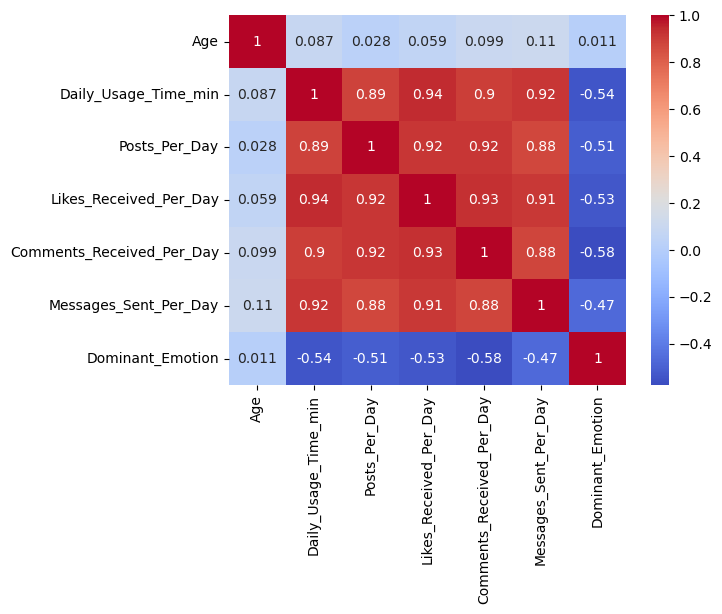

In [83]:
#Transformation de la variable cible en variable numérique pour pouvoir l'inclure à la table de corrélation.
train['Dominant_Emotion'] = train['Dominant_Emotion'].map({'Happiness':0, 'Anger':1, 'Neutral':2, 'Anxiety':3, 'Boredom':4, 'Sadness':5})

#Sélection des variables numériques
train_num = train.select_dtypes([int, float]).columns

#Matrice de corrélation
sns.heatmap(train[train_num].corr(), annot = True, cmap = "coolwarm");
plt.show();

Les matrices d'utilisation des réseaux sociaux sont très corrélées entre elles. Cela pose un risque de colinéarité. Pour les premiers tests de Machine Learning, nous effectuerons les tests sur toutes les variables. Si cela pose problème, nous trouverons une solution.

Avant de passer à la partie suivante, appliquons aux dataframes test et val les mêmes transformations effectuées au cours de cette partie que sur le dataframe train.

In [85]:
#Changement de nom de la colonne durée (simplification nécessaire pour réaliser le test statistique).
test = test.rename(columns = {"Daily_Usage_Time (minutes)" : "Daily_Usage_Time_min"})
val = val.rename(columns = {"Daily_Usage_Time (minutes)" : "Daily_Usage_Time_min"})

#Encodage de la variable cible (réalisée pour intégrer la variable à la heatmap).
test['Dominant_Emotion'] = test['Dominant_Emotion'].map({'Happiness':0, 'Anger':1, 'Neutral':2, 'Anxiety':3, 'Boredom':4, 'Sadness':5})
val['Dominant_Emotion'] = val['Dominant_Emotion'].map({'Happiness':0, 'Anger':1, 'Neutral':2, 'Anxiety':3, 'Boredom':4, 'Sadness':5})

## 4. Preprocessing

In [87]:
# Enregistrement des df avant modifications (en triant selon l'index)
train_save1 = train.sort_index()
test_save1 = test.sort_index()
val_save1 = val.sort_index()

#Supression colonne User_ID
train = train.drop("User_ID", axis = 1)
test = test.drop("User_ID", axis = 1)
val = val.drop("User_ID", axis = 1)

In [88]:
#Import des librairies
from sklearn.preprocessing import StandardScaler


#Séparation des dataframes
X_train, y_train = train.drop("Dominant_Emotion", axis = 1), train["Dominant_Emotion"]
X_test, y_test = test.drop("Dominant_Emotion", axis = 1), test["Dominant_Emotion"]
X_val, y_val = val.drop("Dominant_Emotion", axis = 1), val["Dominant_Emotion"]

#Encodage valeurs
cat_col = ["Gender", "Platform"]

X_train_ohe = pd.get_dummies(X_train[cat_col], drop_first = True)
X_test_ohe = pd.get_dummies(X_test[cat_col], drop_first = True)
X_val_ohe = pd.get_dummies(X_val[cat_col], drop_first = True)

X_train = X_train.join(X_train_ohe)
X_train = X_train.drop(cat_col, axis = 1)

X_test = X_test.join(X_test_ohe)
X_test = X_test.drop(cat_col, axis = 1)

X_val = X_val.join(X_val_ohe)
X_val = X_val.drop(cat_col, axis = 1)

#Standardisation
num_col = X_train.select_dtypes([int, float]).columns

scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])
X_val[num_col] = scaler.transform(X_val[num_col])

## 5. Modèle

### a. Premières itérations

In [93]:
#Importation librairies

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm


In [94]:
#Arbre de décision
#Instancier le modèle
dt_clf = DecisionTreeClassifier(random_state = 42)

#Entrainement du modèle sur les données d'entrainement
dt_clf.fit(X_train, y_train)

#Enregistrement des prédictions du modèle en l'appliquant à X_test
y_pred = dt_clf.predict(X_test)

#Scores
print("Arbre de décision\n")
print("Données d'entrainement :", dt_clf.score(X_train, y_train))
print("Données de test : ", dt_clf.score(X_test, y_test))
print("Données de validation : ", dt_clf.score(X_val, y_val))

print("\n", pd.crosstab(y_test, y_pred))

print("\n", classification_report(y_test, y_pred))

Arbre de décision

Données d'entrainement : 1.0
Données de test :  0.9375
Données de validation :  0.8062015503875969

 col_0              0  1   2   3   4   5
Dominant_Emotion                       
0                 13  0   0   0   0   0
1                  0  9   0   0   0   0
2                  0  0  23   0   1   0
3                  1  0   1  19   0   0
4                  0  1   0   0  13   1
5                  1  0   0   0   0  13

               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.90      1.00      0.95         9
           2       0.96      0.96      0.96        24
           3       1.00      0.90      0.95        21
           4       0.93      0.87      0.90        15
           5       0.93      0.93      0.93        14

    accuracy                           0.94        96
   macro avg       0.93      0.94      0.93        96
weighted avg       0.94      0.94      0.94        96



In [95]:
#Random Forrest

#Instancier un modèle RandomForest
rf = RandomForestClassifier(random_state = 42)

#Entrainement du modèle sur les données d'entrainement
rf.fit(X_train, y_train)

#Enregistrement des prédictions du modèle en l'appliquant à X_test
y_pred = rf.predict(X_test)

#Scores
print("Random Forrest\n")
print("Données d'entrainement :", rf.score(X_train, y_train))
print("Données de test : ", rf.score(X_test, y_test))
print("Données de validation : ", rf.score(X_val, y_val))

print("\n", pd.crosstab(y_test, y_pred))

print("\n", classification_report(y_test, y_pred))

Random Forrest

Données d'entrainement : 1.0
Données de test :  0.9583333333333334
Données de validation :  0.813953488372093

 col_0              0  1   2   3   4   5
Dominant_Emotion                       
0                 13  0   0   0   0   0
1                  0  9   0   0   0   0
2                  0  0  23   0   1   0
3                  1  0   0  20   0   0
4                  0  0   1   0  13   1
5                  0  0   0   0   0  14

               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00         9
           2       0.96      0.96      0.96        24
           3       1.00      0.95      0.98        21
           4       0.93      0.87      0.90        15
           5       0.93      1.00      0.97        14

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



In [96]:
lr = LogisticRegression(random_state = 42)

#Entrainement du modèle sur les données d'entrainement
lr.fit(X_train, y_train)

#Enregistrement des prédictions du modèle en l'appliquant à X_test
y_pred = lr.predict(X_test)

#Scores
print("Régression Logistique\n")
print("Données d'entrainement :", lr.score(X_train, y_train))
print("Données de test : ", lr.score(X_test, y_test))
print("Données de validation : ", lr.score(X_val, y_val))

print("\n", pd.crosstab(y_test, y_pred))

print("\n", classification_report(y_test, y_pred))

Régression Logistique

Données d'entrainement : 0.578
Données de test :  0.5833333333333334
Données de validation :  0.5193798449612403

 col_0              0  1   2   3   4  5
Dominant_Emotion                      
0                 11  1   0   1   0  0
1                  1  5   3   0   0  0
2                  0  0  13   1   3  7
3                  1  4   1  10   2  3
4                  0  0   2   1  12  0
5                  1  2   4   2   0  5

               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.42      0.56      0.48         9
           2       0.57      0.54      0.55        24
           3       0.67      0.48      0.56        21
           4       0.71      0.80      0.75        15
           5       0.33      0.36      0.34        14

    accuracy                           0.58        96
   macro avg       0.58      0.60      0.58        96
weighted avg       0.59      0.58      0.58        96



In [97]:
svc = svm.SVC(random_state = 42)

#Entrainement du modèle sur les données d'entrainement
svc.fit(X_train, y_train)

#Enregistrement des prédictions du modèle en l'appliquant à X_test
y_pred = svc.predict(X_test)

#Scores
print("Support Vector Machine\n")
print("Données d'entrainement :", svc.score(X_train, y_train))
print("Données de test : ", svc.score(X_test, y_test))
print("Données de validation : ", svc.score(X_val, y_val))

print("\n", pd.crosstab(y_test, y_pred))

print("\n", classification_report(y_test, y_pred))

Support Vector Machine

Données d'entrainement : 0.874
Données de test :  0.8541666666666666
Données de validation :  0.6744186046511628

 col_0              0  1   2   3   4   5
Dominant_Emotion                       
0                 12  1   0   0   0   0
1                  0  9   0   0   0   0
2                  0  0  21   2   1   0
3                  0  1   0  16   4   0
4                  0  0   1   0  13   1
5                  0  0   2   0   1  11

               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.82      1.00      0.90         9
           2       0.88      0.88      0.88        24
           3       0.89      0.76      0.82        21
           4       0.68      0.87      0.76        15
           5       0.92      0.79      0.85        14

    accuracy                           0.85        96
   macro avg       0.86      0.87      0.86        96
weighted avg       0.87      0.85      0.86        

Le Support Vector Machine donne donc les meilleures performances tout en limitant le surentraînement. Le Random Forrest donne aussi des résultats satisfaisants, mais il convient de limiter le surapprentissage. Nous optimiserons ces deux modèles.

### b. Optimisation des modèles

Ici, nous souhaitons des classes équilibrées. Donc nous choisissons de maximiser le F1-score.

Commençons par le Random Forrest :

In [101]:
#Importation de la grid search cv
from sklearn.model_selection import GridSearchCV


In [102]:
#Instancier un modèle RandomForest
rf = RandomForestClassifier(class_weight = "balanced", random_state = 42) #Class_weight balance pour corriger le déséquilibre entre les classes.

#Paramètres de la grille
param = [{'n_estimators': [30, 50, 100, 150],
          'min_samples_leaf': [5, 10, 20, 50],
          'max_depth' : [3,4,5],
          'max_leaf_nodes' : [10, 20, 30, 40, 50]
                 }]

#Instanciation et entraînement de la grille
grid = GridSearchCV(rf, param_grid = param, cv = 3, scoring = "f1_macro")
grille = grid.fit(X_train, y_train)

#Tableaux des scores
display(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']].sort_values('mean_test_score')) 

#Affichage des paramètres
print(grid.best_params_)

#Meilleurs paramètres
best_rf = grid.best_estimator_

#Prédictions de y_test en appliquant le modèle sur x_train
y_pred = best_rf.predict(X_test)

#Scores
print("Données d'entrainement :", best_rf.score(X_train, y_train))
print("Données de test : ", best_rf.score(X_test, y_test))
print("Données de validation : ", best_rf.score(X_val, y_val))

display(pd.crosstab(y_test, y_pred, rownames = ["Réalité"], colnames = ["Prédictions"]))

print("\n", classification_report(y_test, y_pred))

params  mean_test_score
60   {'max_depth': 3, 'max_leaf_nodes': 40, 'min_sa...         0.480309
28   {'max_depth': 3, 'max_leaf_nodes': 20, 'min_sa...         0.480309
76   {'max_depth': 3, 'max_leaf_nodes': 50, 'min_sa...         0.480309
44   {'max_depth': 3, 'max_leaf_nodes': 30, 'min_sa...         0.480309
12   {'max_depth': 3, 'max_leaf_nodes': 10, 'min_sa...         0.480309
..                                                 ...              ...
226  {'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...         0.840273
179  {'max_depth': 5, 'max_leaf_nodes': 20, 'min_sa...         0.841230
227  {'max_depth': 5, 'max_leaf_nodes': 50, 'min_sa...         0.850348
211  {'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...         0.850348
195  {'max_depth': 5, 'max_leaf_nodes': 30, 'min_sa...         0.850348

[240 rows x 2 columns]

{'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'n_estimators': 150}
Données d'entrainement : 0.893
Données de test :  0.8854166666666666
Données de validation :  0.7364341085271318


Prédictions   0  1   2   3   4   5
Réalité                           
0            12  1   0   0   0   0
1             0  8   1   0   0   0
2             0  0  20   3   1   0
3             0  1   1  17   2   0
4             0  0   0   0  14   1
5             0  0   0   0   0  14


               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.80      0.89      0.84         9
           2       0.91      0.83      0.87        24
           3       0.85      0.81      0.83        21
           4       0.82      0.93      0.87        15
           5       0.93      1.00      0.97        14

    accuracy                           0.89        96
   macro avg       0.89      0.90      0.89        96
weighted avg       0.89      0.89      0.89        96



Regardons maintenant le SVC :

In [104]:
#Instancier un SVC
svc = svm.SVC(class_weight = "balanced", random_state = 42) #Class_weight balance pour corriger le déséquilibre entre les classes.

#Paramètres de la grille
param = {'C': [0.01],  
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'kernel': ["linear", "poly", "rbf"]} 

#Instanciation et entraînement de la grille
grid_svc = GridSearchCV(svc, param_grid = param, cv = 4, scoring = "f1_macro")
grille = grid_svc.fit(X_train, y_train)

#Tableaux des scores
display(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']].sort_values('mean_test_score')) 

#Affichage des paramètres
print(grid_svc.best_params_)

#Meilleurs paramètres
best_svc = grid_svc.best_estimator_

#Prédictions de y_test en appliquant le modèle sur x_train
y_pred = best_svc.predict(X_test)

#Scores
print("Données d'entrainement :", best_svc.score(X_train, y_train))
print("Données de test : ", best_svc.score(X_test, y_test))
print("Données de validation : ", best_svc.score(X_val, y_val))

display(pd.crosstab(y_test, y_pred, rownames = ["Réalité"], colnames = ["Prédictions"]))

print("\n", classification_report(y_test, y_pred))

params  mean_test_score
2           {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}         0.045977
7       {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}         0.045977
8        {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}         0.045977
10     {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}         0.045977
11      {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}         0.045977
13    {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}         0.045977
14     {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}         0.045977
4        {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}         0.147564
5         {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}         0.157735
0        {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}         0.480250
3      {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}         0.480250
6     {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}         0.480250
9    {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}         0.480250
12  {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}         0.480250
1          {'C': 0.01, 'gamma': 1, 'kernel': 'poly'}         0.873251

{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}
Données d'entrainement : 0.905
Données de test :  0.84375
Données de validation :  0.7286821705426356


Prédictions   0  1   2   3   4   5
Réalité                           
0            12  1   0   0   0   0
1             0  9   0   0   0   0
2             0  0  17   6   1   0
3             0  1   0  19   1   0
4             0  1   0   0  13   1
5             0  1   0   2   0  11


               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.69      1.00      0.82         9
           2       1.00      0.71      0.83        24
           3       0.70      0.90      0.79        21
           4       0.87      0.87      0.87        15
           5       0.92      0.79      0.85        14

    accuracy                           0.84        96
   macro avg       0.86      0.86      0.85        96
weighted avg       0.87      0.84      0.85        96



Le RandomForrest donne donc la meilleure option pour la prédiction, tout en limitant le surentrainement.

### c. Interprétation

Pour pour pouvoir interpréter le RandomForrest retenu, nous allons premièrement nous intéresser à l'importance de chaque variable :

In [109]:
importance = best_rf.feature_importances_

importance_tab = pd.DataFrame(data=importance, index = X_train.columns).rename(columns = {0 : "Importance"})
importance_tab = importance_tab.sort_values(by = "Importance", ascending = False)
importance_tab

Importance
Daily_Usage_Time_min         0.179964
Likes_Received_Per_Day       0.157020
Comments_Received_Per_Day    0.142436
Age                          0.129060
Messages_Sent_Per_Day        0.119419
Posts_Per_Day                0.095171
Platform_Twitter             0.047174
Platform_Instagram           0.045591
Platform_LinkedIn            0.019163
Gender_Non-binary            0.017621
Platform_Snapchat            0.015014
Gender_Male                  0.013505
Platform_Whatsapp            0.009729
Platform_Telegram            0.009133

L'utilisation des RS ressort le plus : minutes passées par jour, nombre de likes et commentaires reçus, suivie de l'âge. En termes de plateformes, Twitter et Insagram semblent avoir été les plus prises en compte. 

Maintenant, intéressons-nous à l'arbre de décision.

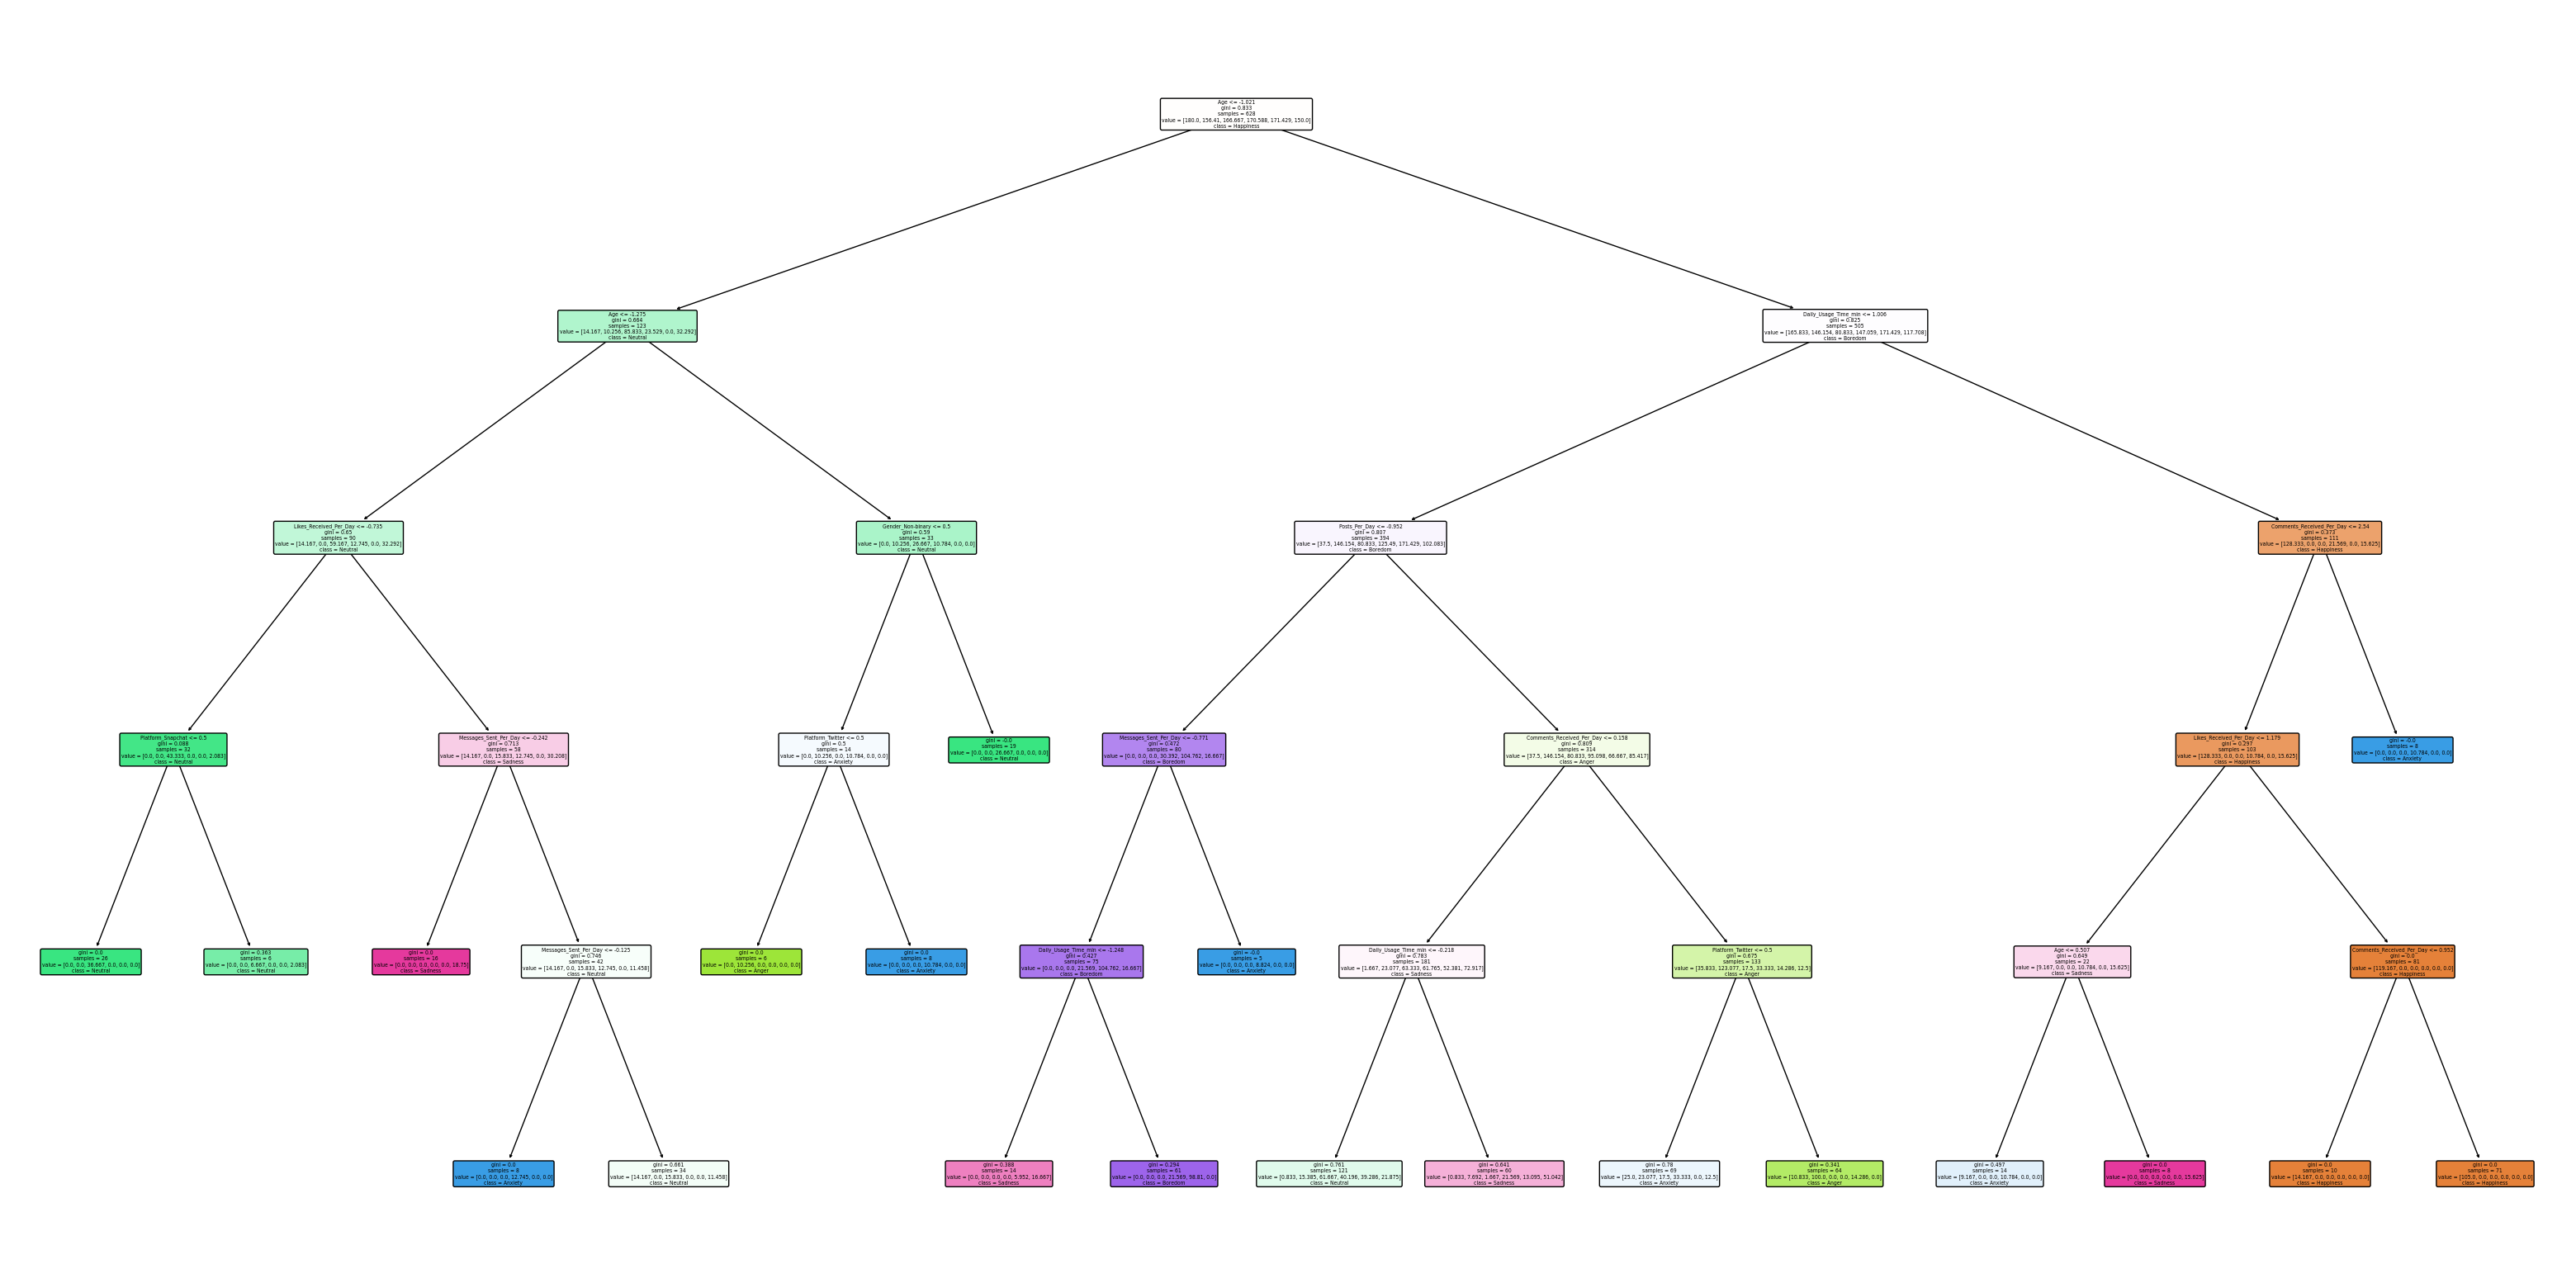

In [111]:
#Import librairie
from sklearn.tree import plot_tree

#choix des paramètres du modèle choisi
estimators = best_rf.estimators_[0]

#Labels et classes à afficher sur l'arbre
fn=['Age', 'Daily_Usage_Time_min', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary',
       'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat',
       'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
cn=["Happiness", "Anger", "Neutral", "Anxiety", "Boredom", "Sadness"]

#Tracer la figure
fig, ax = plt.subplots(figsize=(40, 20))

#Générer l'arbre
plot_tree(estimators,
          feature_names=fn,
          class_names=cn,
          filled=True,
          rounded=True)

#Afficher l'arbre
plt.show()

#Sauvegarder l'arbre en format PNG
fig.savefig("decistion_tree.png")

Ici, il peut être intéressant d'analyser les principaux déterminants de chaque émotion. En gardant en tête que l'interprétation d'un arbre issue d'un RandomForrest peut être confuse, d'autant plus que les données affichées sont normalisées.

Par émotion :
- Neutralité : notamment chez les plus jeunes, le fait d'être non-binaire ou alors de recevoir peu de likes.
- Bonheur : ne pas être parmi les plus jeunes, utiliser longtemps les RS, recevoir beaucoup de likes et de commentaires. Cela active le circuit de la dopamine. Attention : recevoir énormément de commentaires est lié à l'anxiété.
- Tristesse : chez les plus jeunes, recevoir des likes, mais envoyer peu de messages. Chez les plus âgés, utiliser énormément les RS, poster activement, mais recevoir peu de commentaires.
- Colère : beaucoup utiliser les RS, recevoir plus de commentaires que la moyenne et utiliser Twitter.
- Ennui : peu poster, envoyer peu de messages
- Anxiété : chez les non-binaires, utiliser Twitter. Chez les plus jeunes, recevoir des likes et envoyer peu de messages (légèrement plus que ceux qui se sentent tristes). Enfin, en dehors des plus jeunes, utiliser beaucoup les RS et recevoir énormément de messages.

Si nous voyons de grandes tendances se dessiner, il est difficile de dresser des constats clairs issus de l'arbre de décision. Le clustering, en regroupants les individus similaires, nous permettrait d'y voir plus clair.

## 6. Clustering

### a. Réduction de dimension

Avant de séparer le groupe d'individus en personae, assurons-nous de le faire sur la base d'un jeu de données où les dimensions ont été réduites. Nous pouvons réutiliser le jeu de données qui a été utilisé pour l'apprentissage du modèle.

In [116]:
data = X_train
data

Age  Daily_Usage_Time_min  Posts_Per_Day  Likes_Received_Per_Day  \
0   -0.638987              0.619350      -0.167745                0.193399   
1    0.633896             -0.153228       0.877393               -0.754264   
2   -1.402717             -0.925806      -0.690313               -0.943797   
3    0.124743              2.679559       2.445098                2.278259   
4    1.397625             -1.312096      -1.212882               -1.322863   
..        ...                   ...            ...                     ...   
784 -1.402717             -0.668280      -1.212882               -0.678451   
785  0.379319             -0.539517      -0.690313               -0.754264   
786  0.124743              0.104298       0.354824               -0.109853   
787  0.888472             -0.281991      -0.167745                0.193399   
788 -1.657294             -0.925806      -1.212882               -0.830078   

     Comments_Received_Per_Day  Messages_Sent_Per_Day  Gender_Male  \
0                    -0.636523              -1.240599        False   
1                     1.065106               0.874059         True   
2                    -1.203732              -0.300751        False   
3                     1.632316               3.223679        False   
4                    -1.544058              -1.475561         True   
..                         ...                    ...          ...   
784                  -0.976848              -0.065789         True   
785                  -0.863407              -0.300751        False   
786                  -0.182755               0.404135        False   
787                   0.497897               0.639097         True   
788                  -0.976848              -1.240599        False   

     Gender_Non-binary  Platform_Instagram  Platform_LinkedIn  \
0                False                True              False   
1                False               False              False   
2                 True               False              False   
3                False                True              False   
4                False               False               True   
..                 ...                 ...                ...   
784              False               False              False   
785               True               False              False   
786              False               False              False   
787              False               False              False   
788               True               False              False   

     Platform_Snapchat  Platform_Telegram  Platform_Twitter  Platform_Whatsapp  
0                False              False             False              False  
1                False              False              True              False  
2                False              False             False              False  
3                False              False             False              False  
4                False              False             False              False  
..                 ...                ...               ...                ...  
784              False              False              True              False  
785              False              False             False              False  
786              False              False             False               True  
787              False               True             False              False  
788               True              False             False              False  

[1000 rows x 14 columns]

Nous remarquons la présence de nombreuses données non numériques. Remplaçons les réponses False par 0 et True par 1 pour pouvoir intégrer ces données à la réduction de dimension.

In [118]:
data_bool = data.select_dtypes(bool) #Sélection des colonnes de types booléennes

col_bool = data_bool.columns #Enregistrement du nom des colonnes

data[col_bool] = data[col_bool].replace({False : 0, True : 1}) #Remplacement
data

Age  Daily_Usage_Time_min  Posts_Per_Day  Likes_Received_Per_Day  \
0   -0.638987              0.619350      -0.167745                0.193399   
1    0.633896             -0.153228       0.877393               -0.754264   
2   -1.402717             -0.925806      -0.690313               -0.943797   
3    0.124743              2.679559       2.445098                2.278259   
4    1.397625             -1.312096      -1.212882               -1.322863   
..        ...                   ...            ...                     ...   
784 -1.402717             -0.668280      -1.212882               -0.678451   
785  0.379319             -0.539517      -0.690313               -0.754264   
786  0.124743              0.104298       0.354824               -0.109853   
787  0.888472             -0.281991      -0.167745                0.193399   
788 -1.657294             -0.925806      -1.212882               -0.830078   

     Comments_Received_Per_Day  Messages_Sent_Per_Day  Gender_Male  \
0                    -0.636523              -1.240599            0   
1                     1.065106               0.874059            1   
2                    -1.203732              -0.300751            0   
3                     1.632316               3.223679            0   
4                    -1.544058              -1.475561            1   
..                         ...                    ...          ...   
784                  -0.976848              -0.065789            1   
785                  -0.863407              -0.300751            0   
786                  -0.182755               0.404135            0   
787                   0.497897               0.639097            1   
788                  -0.976848              -1.240599            0   

     Gender_Non-binary  Platform_Instagram  Platform_LinkedIn  \
0                    0                   1                  0   
1                    0                   0                  0   
2                    1                   0                  0   
3                    0                   1                  0   
4                    0                   0                  1   
..                 ...                 ...                ...   
784                  0                   0                  0   
785                  1                   0                  0   
786                  0                   0                  0   
787                  0                   0                  0   
788                  1                   0                  0   

     Platform_Snapchat  Platform_Telegram  Platform_Twitter  Platform_Whatsapp  
0                    0                  0                 0                  0  
1                    0                  0                 1                  0  
2                    0                  0                 0                  0  
3                    0                  0                 0                  0  
4                    0                  0                 0                  0  
..                 ...                ...               ...                ...  
784                  0                  0                 1                  0  
785                  0                  0                 0                  0  
786                  0                  0                 0                  1  
787                  0                  1                 0                  0  
788                  1                  0                 0                  0  

[1000 rows x 14 columns]

Les valeurs propres sont : [4.81817869 1.02469916 0.33658046 0.20138682 0.15613478 0.11580479
 0.09770608 0.0834719  0.07026447 0.06214219 0.05817155 0.04623301
 0.02524999 0.01248463]
Les ratios de variance expliquée sont : [0.67780445 0.14415108 0.04734896 0.02833039 0.02196449 0.01629101
 0.01374495 0.01174253 0.00988456 0.00874194 0.00818337 0.0065039
 0.00355208 0.00175629] 



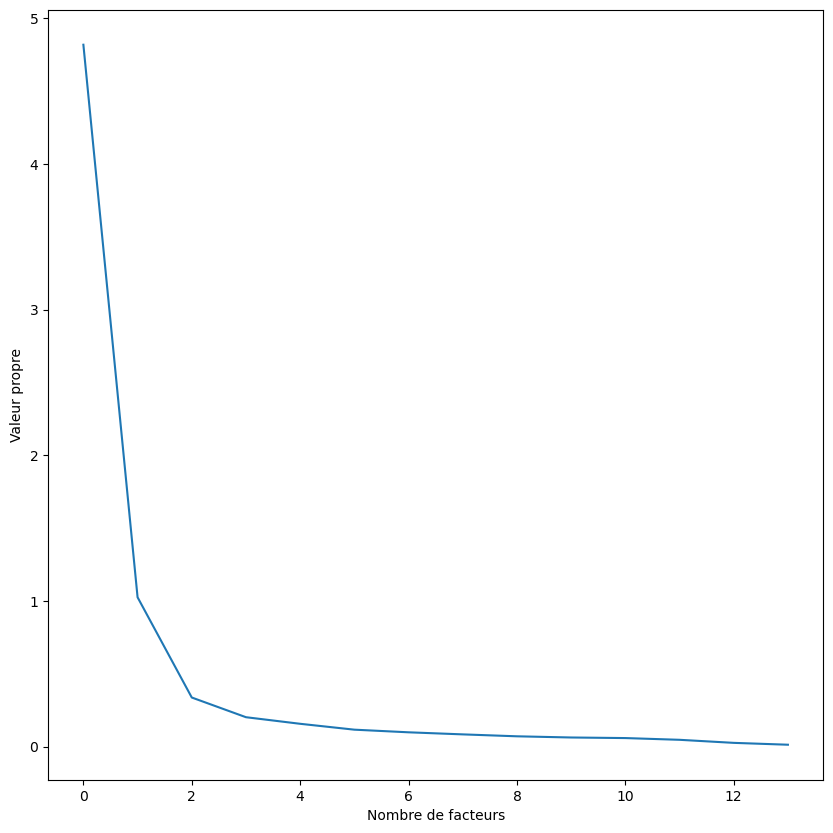

In [119]:
#Importation des librairies
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Instanciation et entraînement
pca = PCA()
coor = pca.fit_transform(data)

#Affichage des valeurs propres
print('Les valeurs propres sont :', pca.explained_variance_, "\n")
print('Les ratios de variance expliquée sont :', pca.explained_variance_ratio_, "\n")

#Figure de la variance expliquée par facteur
plt.figure(figsize=(10, 10))
plt.plot(np.arange(0,len(pca.explained_variance_)), pca.explained_variance_)
plt.xlabel("Nombre de facteurs")
plt.ylabel("Valeur propre")
plt.show()

Nous voyons ici qu'avec deux facteurs, nous gardons une part importante de la variance expliquée. Regardons le cumul de la variance expliquée. 

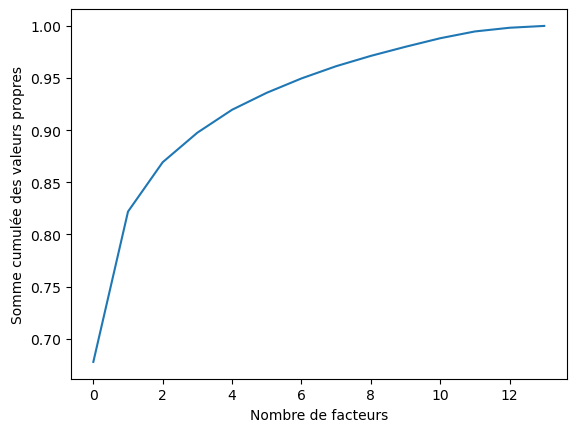

In [121]:
plt.plot(np.arange(0,len(pca.explained_variance_)), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Nombre de facteurs')
plt.ylabel('Somme cumulée des valeurs propres');

Effectivement, avec deux facteurs, nous conservons près de 87% de la variance expliquée. Ce qui signifie que 87% de l'information du dataframe peut être résumée en conservant deux colonnes, qui nous permetteront de représenter graphiquement les données selon deux axes. Regardons la matrice de corrélation pour comprendre quelles sont les variables les plus importantes dans la constitution de ces deux axes :

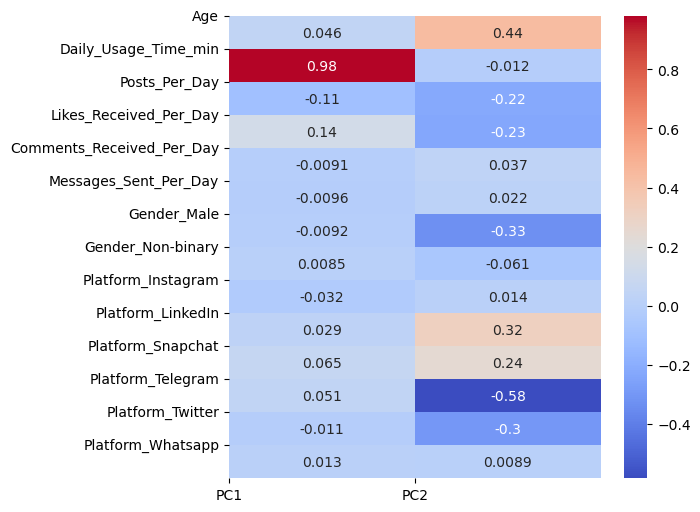

In [124]:
plt.figure(figsize = (6, 6))

sns.heatmap(pca.components_[:,:2], annot = True, cmap= "coolwarm")
plt.xticks([0,1], ["PC1", "PC2"])
plt.yticks(range(0,14), data.columns, rotation = 0);

Nous voyons ici que le premier axe est très corrélé au temps d'utilisation. Le second axe est positivement corrêlé à l'âge et à l'utilisation de Linkedin, et corrêlé négativement à l'utilisation de Telegram et au fait d'être un homme. Regardons visuellement ce que nous obtenons :

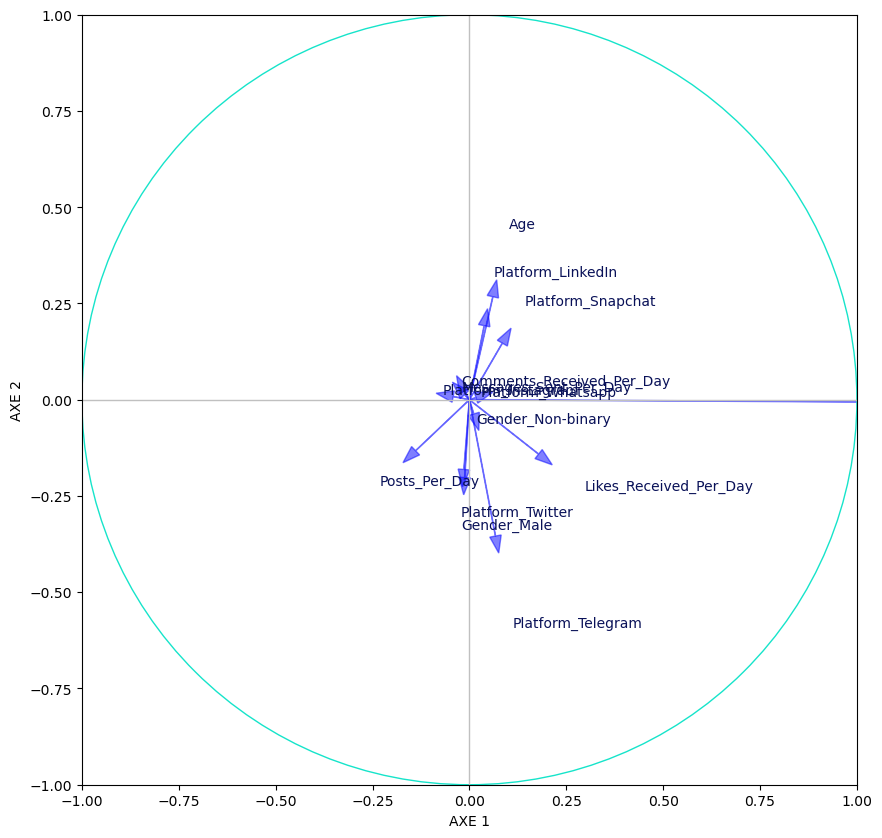

In [126]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((14, 14))
for k in range(14):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]
    
# Délimitation de la figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Affichage des variables
for j in range(14):
    plt.annotate(data.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')
    
# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Cercle et légendes
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2');

Nous retrouvons ici les résultats de la heatmap. L'axe 1 (abscisses) est strictement corrélé à au temps d'utilisation (tellement que l'on ne le voit plus dans le graphique). Et nous retrouvons, pour l'axe 2 (ordonnées) la corrélation positive sur l'âge et l'utilisation de Linkedin, et en négatif essentiellement la non-utilisation de Telegram, et le fait d'être un homme.

Pour l'axe 2, l'on devine une population qui a commencé à travailler. Concernant la référence aux hommes et à Télégram, elles sont plus difficiles à comprendre, d'autant plus que les interviews sont recoltées dans le monde entier.

Regardons maintenant la représentation graphique.

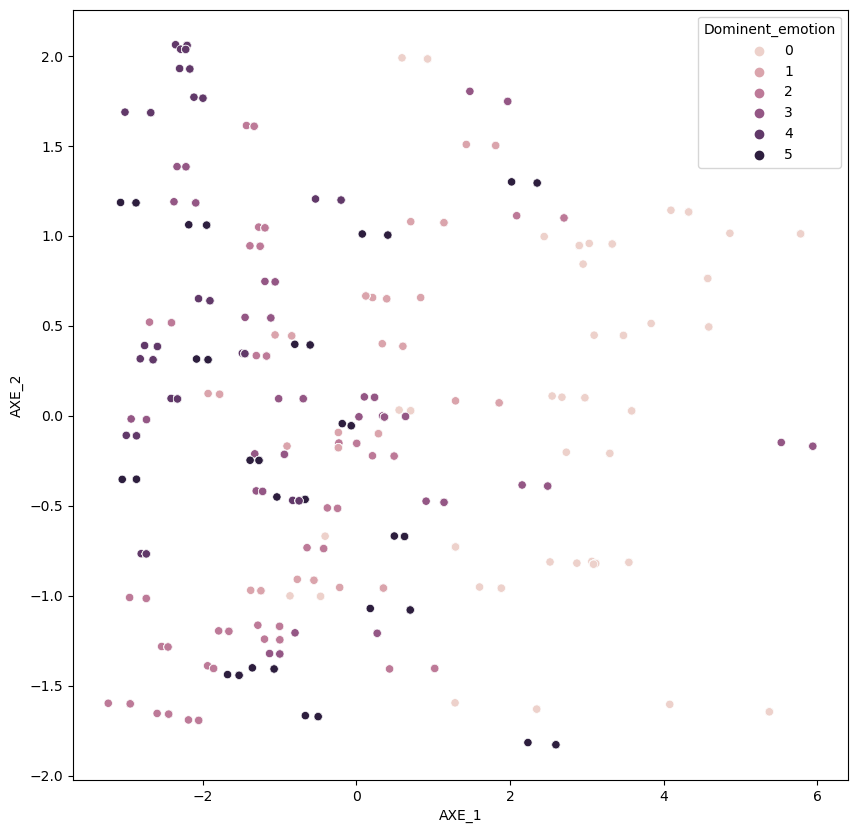

In [128]:
data_ACP = {
"Dominent_emotion" : y_train,
"AXE_1" : coor[:,0],
"AXE_2" : coor[:,1]
}
PCA_mat = pd.DataFrame(data_ACP)

plt.figure(figsize=(10, 10))
sns.scatterplot(data = PCA_mat, x="AXE_1", y="AXE_2", hue = "Dominent_emotion");


Le seul enseignement clair est que plus on passe de temps sur les RS, plus l'on se sent heureux au cours de la journée. Les autres catégories sont plus difficiles à cerner. Une analyse LDA pourrait permettre d'y voir plus clair.

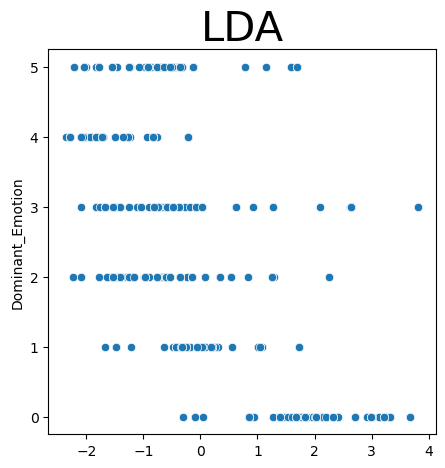

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

LDA = lda.fit_transform(data, y_train)

data_lda = {
"Dominent_emotion" : y_train,
"AXE_1" : LDA[:,0],
}

lda_df = pd.DataFrame(data_lda)

plt.figure(figsize=(5, 5))
sns.scatterplot(x=LDA[:,0], y=y_train)
plt.title('LDA', fontsize=30);

En ne conservant qu'un axe d'analyse, l'Analyse Discriminante Linéaire permet de visualiser plus facilement répartition des classes selon cet axe. Nous retrouvons les individus plus heureux parmi ceux qui utilisent le plus les RS.

Les individus qui se sentent neutres, anxieux et tristes ont relativement le même temps d'utilisation. Les individus qui s'ennuient utilisent moins les réseaux sociaux. Enfin, les individus en colère se distinguent légèrement, puisqu'il sont plus concentrés autour de la moyenne.

### b. Création de personae

C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\c

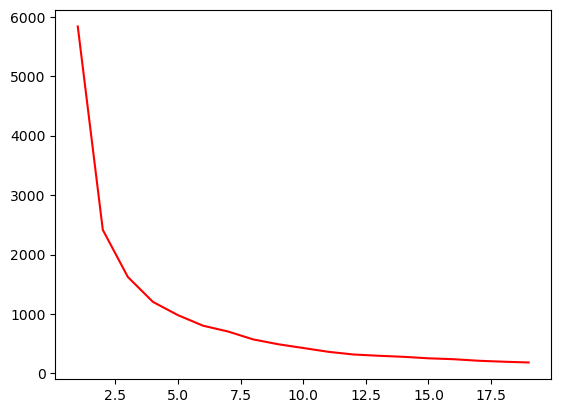

In [133]:
from sklearn.cluster import KMeans

df_kmeans = PCA_mat.drop("Dominent_emotion", axis = 1)

#Inertie selon le nombre de clusters principaux
L = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_kmeans)
    L.append(kmeans.inertia_) 

#Figure de l'inertie selon les clusters
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(range(1, 20), L, c='red');

Selon la méthode du coude, nous pouvons choisir 3 à 4 clusters. Nous choisissons 4, car au-delà, l'inertie conservée est minime. Et nous pourrons avoir plus de personae.

C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



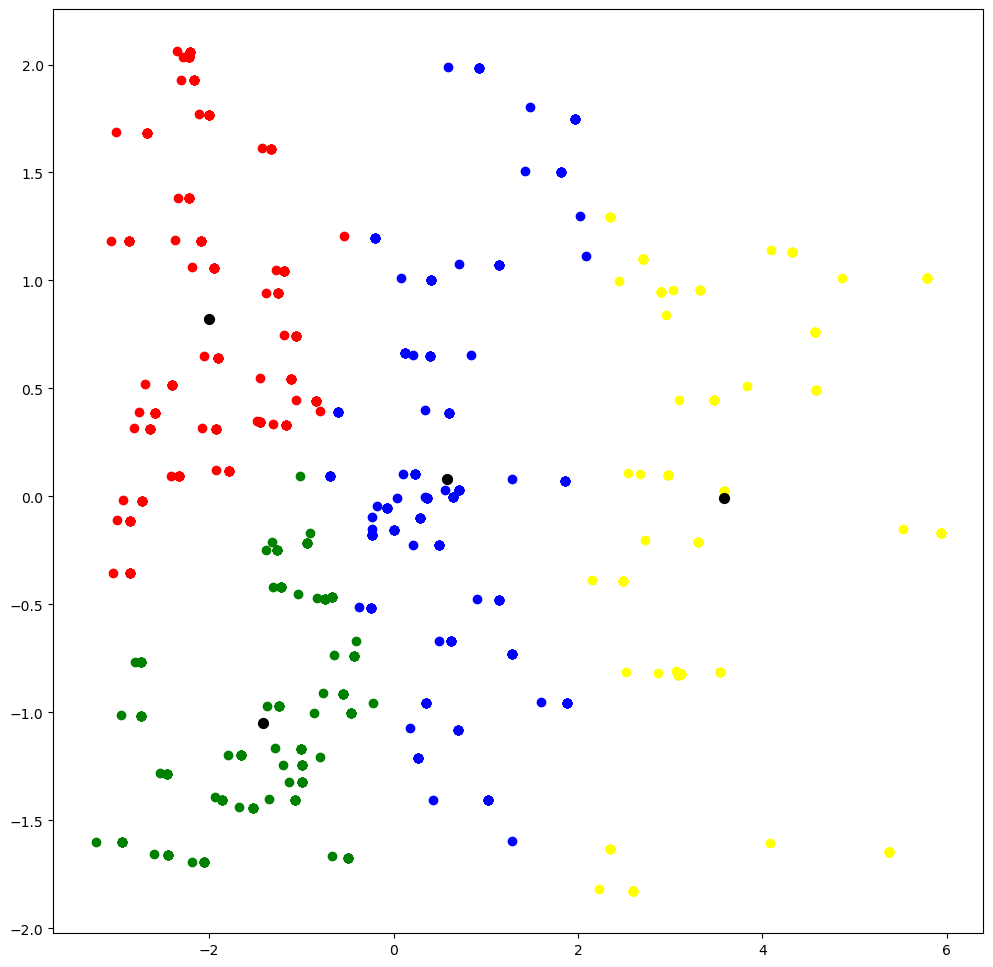

In [135]:
#Instanciation
kmeans = KMeans(n_clusters=4, random_state = 42)

#Entrainement
kmeans.fit(df_kmeans)

#Prédictions
y_kmeans = kmeans.predict(df_kmeans)

#Figure
plt.figure(figsize=(10,10))
plt.scatter(df_kmeans[y_kmeans == 0].iloc[:,0], df_kmeans[y_kmeans == 0].iloc[:,1], color = "yellow")
plt.scatter(df_kmeans[y_kmeans == 1].iloc[:,0], df_kmeans[y_kmeans == 1].iloc[:,1], color = "green")
plt.scatter(df_kmeans[y_kmeans == 2].iloc[:,0], df_kmeans[y_kmeans == 2].iloc[:,1], color = "blue")
plt.scatter(df_kmeans[y_kmeans == 3].iloc[:,0], df_kmeans[y_kmeans == 3].iloc[:,1], color = "red")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black", s=50);

Pour la prochaine section, voici à quelle couleur correspond chaque cluster :
- Cluster 1 : jaune
- Cluster 2 : vert
- Cluster 3 : bleu
- Cluster 4 : rouge


### c. Compréhension des personae

Commençons par analyser les émotions dominantes dans chaque cluster. Mais avant, il convient d'ajouter les clusters au dataframe train pour pouvoir effectuer des statistiques descriptives.

In [139]:
train = train.reset_index()

#Copie du dataframe train pour réaliser des statistiques.
train_clusters = train

#Remplacement des chiffres par les valeurs initiales.
train_clusters["Dominant_Emotion"] = train_clusters["Dominant_Emotion"].replace({0:'Happiness', 1:'Anger', 2:'Neutral', 3:'Anxiety', 4:'Boredom', 5:'Sadness'})

#Création d'un dataframe qui enregistre le cluster pour chaque individu.
kmeans_clusters = pd.DataFrame(data = kmeans.labels_, columns = ["clusters"])

#Jointure des deux dataframes
train_clusters = train_clusters.join(kmeans_clusters)

#Renumérotation des clusters (1 à 4)
train_clusters["clusters"] = train_clusters["clusters"].replace({0:1, 1:2, 2:3, 3:4})
train_clusters["clusters"] = train_clusters["clusters"].astype("str")

In [234]:
train_clusters

index  Age      Gender   Platform  Daily_Usage_Time_min  Posts_Per_Day  \
0        0   25      Female  Instagram                 120.0            3.0   
1        1   30        Male    Twitter                  90.0            5.0   
2        2   22  Non-binary   Facebook                  60.0            2.0   
3        3   28      Female  Instagram                 200.0            8.0   
4        4   33        Male   LinkedIn                  45.0            1.0   
..     ...  ...         ...        ...                   ...            ...   
995    784   22        Male    Twitter                  70.0            1.0   
996    785   29  Non-binary   Facebook                  75.0            2.0   
997    786   28      Female   Whatsapp                 100.0            4.0   
998    787   31        Male   Telegram                  85.0            3.0   
999    788   21  Non-binary   Snapchat                  60.0            1.0   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45.0                       10.0                   12.0   
1                      20.0                       25.0                   30.0   
2                      15.0                        5.0                   20.0   
3                     100.0                       30.0                   50.0   
4                       5.0                        2.0                   10.0   
..                      ...                        ...                    ...   
995                    22.0                        7.0                   22.0   
996                    20.0                        8.0                   20.0   
997                    37.0                       14.0                   26.0   
998                    45.0                       20.0                   28.0   
999                    18.0                        7.0                   12.0   

    Dominant_Emotion clusters  
0          Happiness        2  
1              Anger        3  
2            Neutral        2  
3            Anxiety        1  
4            Boredom        4  
..               ...      ...  
995          Neutral        2  
996          Boredom        4  
997          Anxiety        3  
998          Sadness        3  
999          Neutral        2  

[1000 rows x 11 columns]

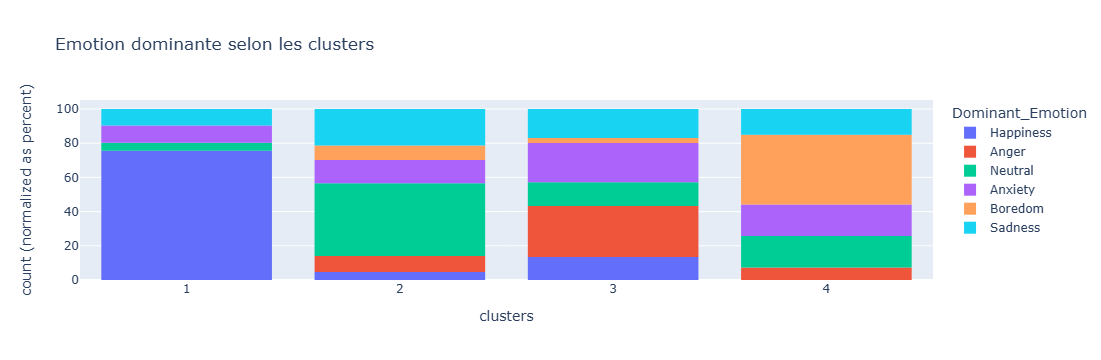

In [140]:
fig = px.histogram(train_clusters, x="clusters",
                   color="Dominant_Emotion",
                   barnorm='percent',
                   title="Emotion dominante selon les clusters (regroupé)",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()


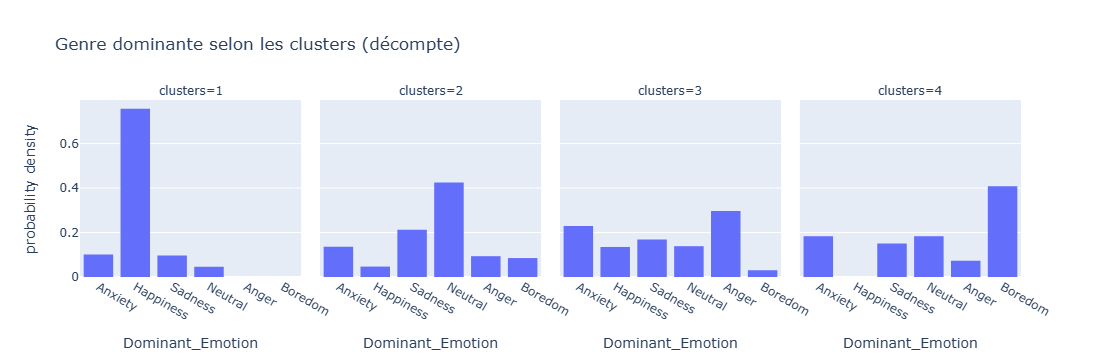

In [321]:
fig = px.histogram(train_clusters, x="Dominant_Emotion",
                   facet_col="clusters",
                   title="Genre dominante selon les clusters (décomposé)",
                   histnorm = "probability density",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

Les clusters ont chacun une ou plusieurs émotions dominantes, plus ou moins marquées :
- Le cluster 1 est de loin le plus heureux (76%).
- Le cluster 2 est celui qui se sent le plus neutre (43%). La tristesse n'est pas négligeable non plus (21%)
- Le cluster 3 est celui qui se sent le plus en colère (30%), et aussi le plus anxieux (23%)
- Le cluster 4 est celui qui se sent le plus ennuyé (41%).

Regardons maintenant la distribution de ces clusters en % de l'échantillon.

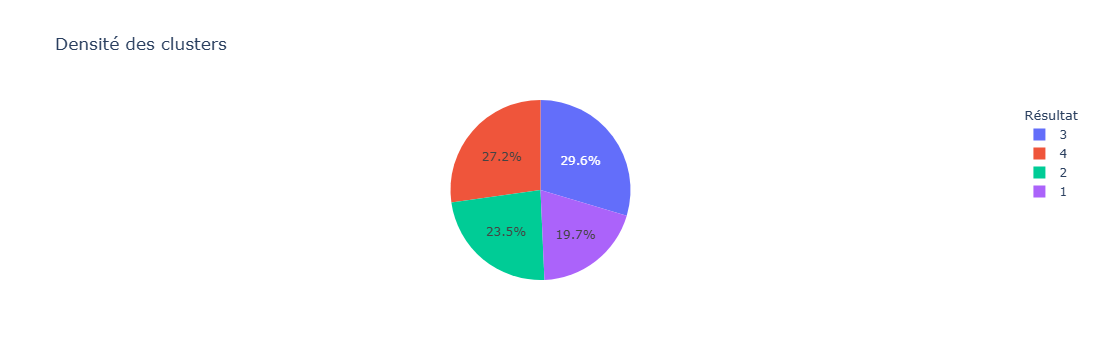

Les clusters 3 et 4 sont les plus nombreux, au contraire du cluster 1.


In [232]:
import plotly.graph_objects as go

#Enregistrement des valeurs pour le graphique
l = train_clusters["clusters"].unique()
occurence = []
for i in range(len(l)):
    occurence.append(train_clusters.loc[train_clusters["clusters"] == l[i]].count()[0])

#Graphique
fig= go.Figure()
fig.add_trace(go.Pie(labels = l, values = occurence, legendgrouptitle_text = "Résultat"))
fig.update_layout(title = "Densité des clusters")
fig.show()

print("Les clusters 3 et 4 sont les plus nombreux, au contraire du cluster 1.")

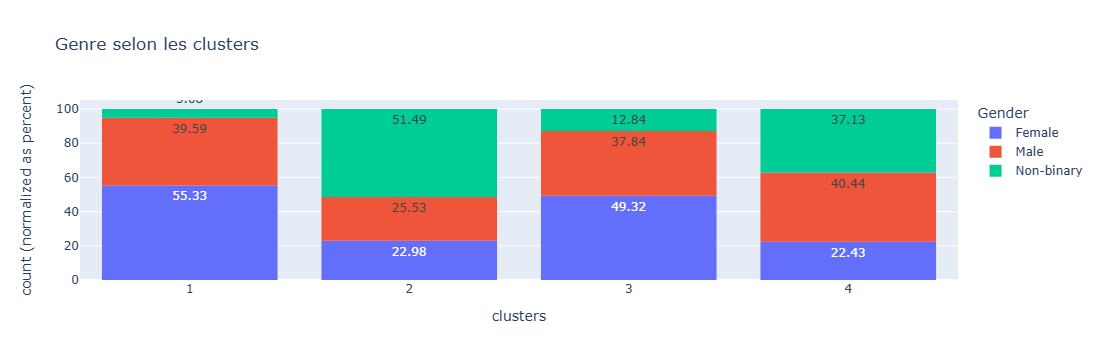

Les clusters 1 et 3 sont les plus féminins. Le cluster 2 comporte le plus de non-binaires.
Enfin, le cluster 4 de plus d'hommes et de non-binaires que de femmes.


In [242]:
fig = px.histogram(train_clusters, x="clusters",
                   color="Gender",
                   barnorm='percent',
                   title="Genre selon les clusters",
                   text_auto='.2f',
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

print("Les clusters 1 et 3 sont les plus féminins. Le cluster 2 comporte le plus de non-binaires.")
print("Enfin, le cluster 4 a plus d'hommes et de non-binaires que de femmes.")

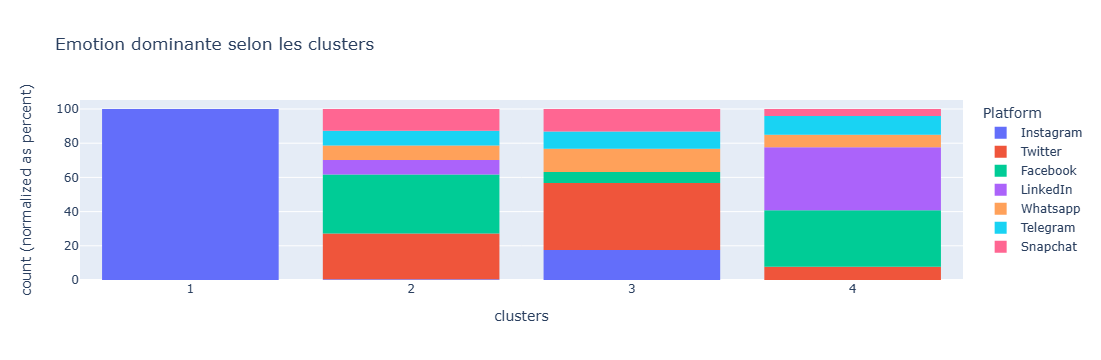

In [244]:
fig = px.histogram(train_clusters, x="clusters",
                   color="Platform",
                   barnorm='percent',
                   title="Plateforme utilisée selon les clusters (regroupé)",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

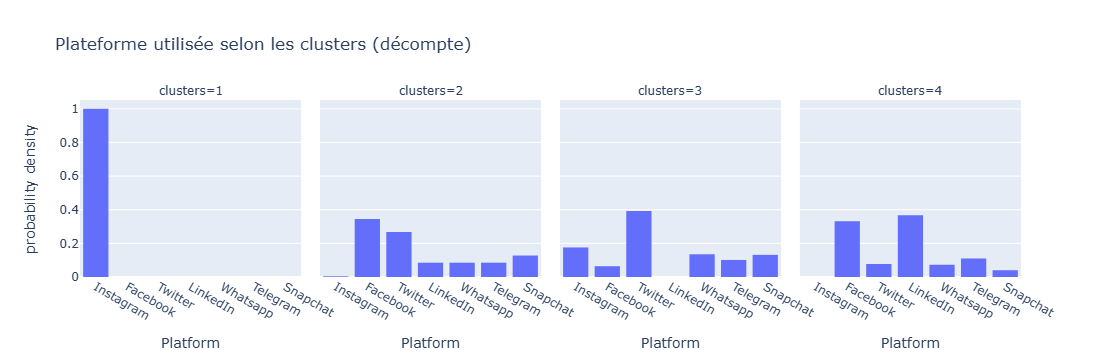

In [283]:
fig = px.histogram(train_clusters, x="Platform",
                   facet_col="clusters",
                   title="Plateforme utilisée selon les clusters (décomposition)",
                   histnorm = "probability density",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

Les clusters ont des utilisations différentes des réseaux sociaux :
- Cluster 1 : une utilisation d'Instagram à 100%
- Cluster 2 : Facebook (34%) et Twitter (27%) sont les plus utilisés
- Cluster 3 : Twitter est de loin le plus utilisé (39%), suivi d'Instagram (18%)
- Cluster 4 : il est caractèrisé par une utilisation plus forte de Linkedin (37%) et Facebook (33%) 

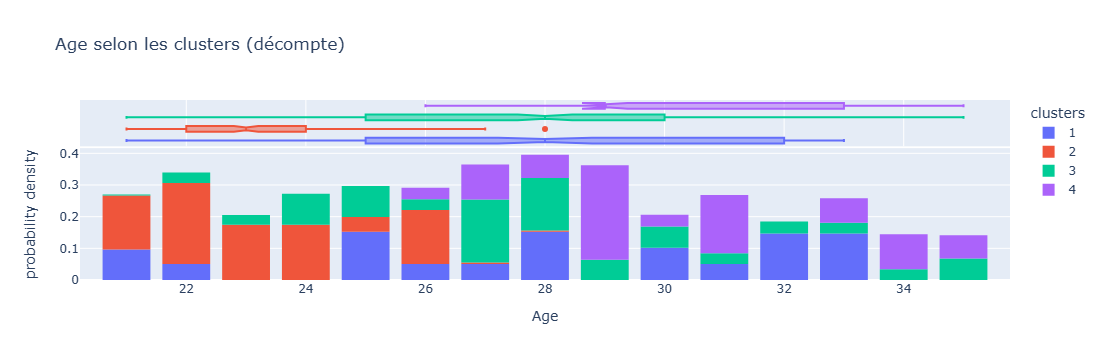

In [329]:
fig = px.histogram(train_clusters, x="Age",
                   color="clusters",
                   title="Age selon les clusters",
                   histnorm = "probability density",
                   marginal = "box",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

L'âge est également très marqué selon les clusters :
- Cluster 1 : représenté parmi toutes les classes d'âge
- Cluster 2 : 75% ont entre 20 et 24 ans
- Cluster 3 : toutes les classes d'âge sont représentées, mais on observe une légère concentration autour de 27 et 28 ans
- Cluster 4 : 75% ont entre 29 et 35 ans.

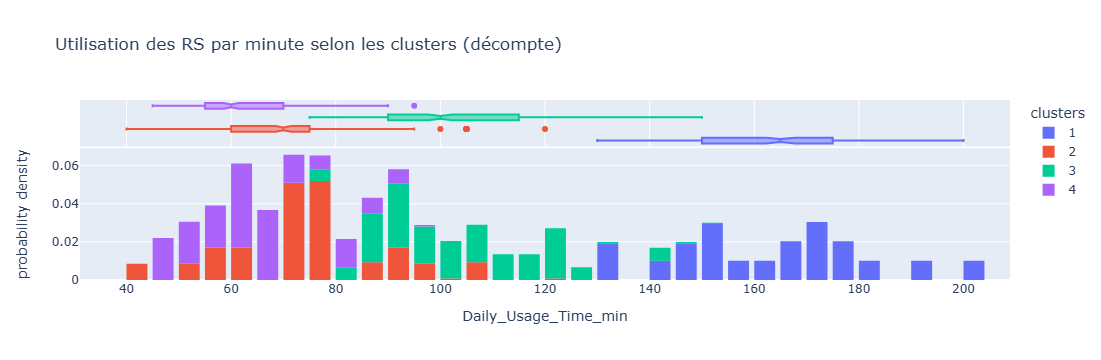

In [315]:
fig = px.histogram(train_clusters, x="Daily_Usage_Time_min",
                   color="clusters",
                   title="Utilisation des RS préférés par minute selon les clusters",
                   histnorm = "probability density",
                   marginal = "box",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

La différence la plus marquée entre les clusters s'opère sur le temps d'utilisation :
- Cluster 1 : il s'agit de loin du cluster avec la plus forte utilisation, avec un premier quartile au dessus de tous les autres. Autrement dit, 75% des individus de ce groupe utilisent les RS plus de 2h30 par jour.
- Cluster 2 : avec une médiane à 1h10 d'utilisation par jour, ce groupe se situe dans la fourchette basse.
- Cluster 3 : ce groupe constitue un entre-deux entre le groupe 1, le plus utilisateur, et les deux autres. La médiane est à 1h40 par jour.
- Cluster 4 : c'est le groupe avec l'utilisation la plus faible des RS, avec une médiane à 1 heure par jour.

Avec quelques nuances, les autres indicateurs liés à l'utilisation des RS suivent les mêmes tendances.

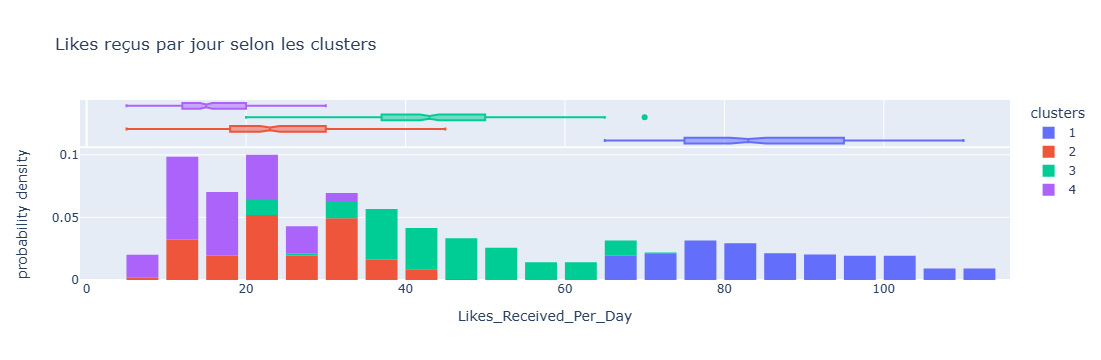

In [333]:
fig = px.histogram(train_clusters, x="Likes_Received_Per_Day",
                   color="clusters",
                   title="Likes reçus par jour selon les clusters",
                   histnorm = "probability density",
                   marginal = "box",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

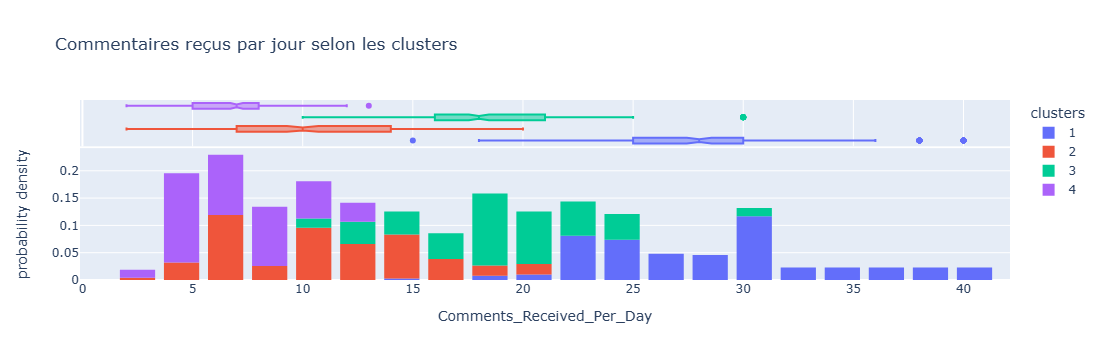

In [335]:
fig = px.histogram(train_clusters, x="Comments_Received_Per_Day",
                   color="clusters",
                   title="Commentaires reçus par jour selon les clusters",
                   histnorm = "probability density",
                   marginal = "box",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

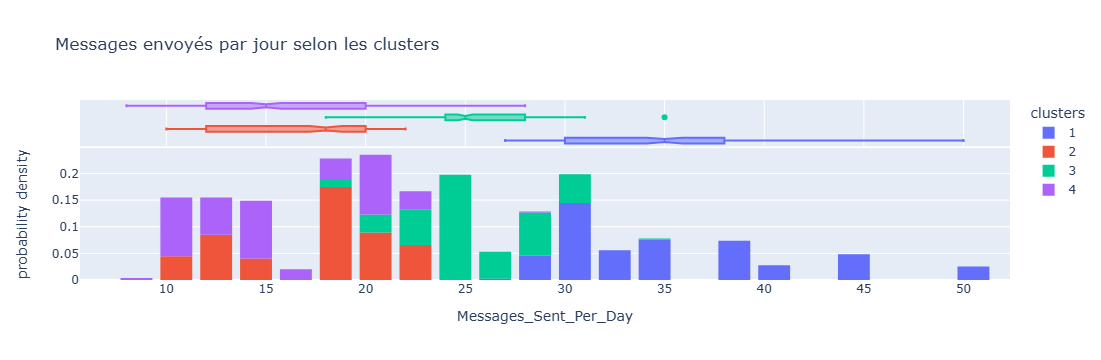

In [337]:
fig = px.histogram(train_clusters, x="Messages_Sent_Per_Day",
                   color="clusters",
                   title="Messages envoyés par jour selon les clusters",
                   histnorm = "probability density",
                   marginal = "box",
                   category_orders = {"clusters" : ["1", "2", "3", "4"]})

fig.update_layout(bargap=0.2)

fig.show()

### c. Récapitulatif des clusters

Cluster 1 : Les utilisateurs épanouïs d'Instagram
- Emotion dominante : bonheur (76%)
- Genre : équilibre entre femmes (55%) et hommes (40%)
- Age : équilibré
- Plateforme privilégiée : Instagram (100%)
- Très forte utilisation des RS sur la plateforme préférée, avec une médiane à 2h45

Ce sont les utilisateurs heureux des réseaux sociaux, en particulier d'Instagram. Ces individus sont marqués par une très forte utilisation d'Instagram et globalement par une activité importante. L'on peut deviner des individus avec des traits de caractères plus sociables. Instagram leur permet d'exprimer cette sensibilité. En retour, ils semblent épanouïs en utilisant cette plateforme. C'est le match parfait.

Cluster 2 : Les jeunes détachés des RS
- Emotion dominante : neutralité (43%), puis tristesse (21%)
- Genre : non-binaires (51%)
- Age : cluster le plus jeune, 75% ont entre 22 et 24 ans
- Plateforme privilégiée : Facebook (34%), puis Twitter (27%)
- Utilisation parmi les moins importantes du réseau social préféré, avec une médiane à 1h10.

Il s'agit d'abord d'un cluster caractérisé par l'âge plus jeune et le genre non-binaire. L'activité sur les RS est peu importante, et la neutralité est l'émotion dominante en fin de journée. Les réseaux sociaux ne semblent pas avoir un impact important sur leurs émotions.

Cluster 3 : Les troublés
- Emotion dominante : colère (30%), puis anxiété (23%)
- Genre : équilibre entre femmes (49%) et hommes (38%)
- Age : le plus équilibré parmi les clusters, avec néanmoins des légers pics à 27 et 28 ans.
- Plateforme privilégiée : Twitter (39%)
- Au niveau de l'activité sur les réseaux sociaux, il s'agit d'un entre-deux entre le groupe 1, le plus utilisateur, et les deux autres. La médiane sur Twitter est à 1h40 par jour.

Ce clusters est le plus équilibré sur les données sociodémographiques et sur l'utilisation des réseaux sociaux. Mais il se distingue par l'utilisation plus prononcée de Twitter, et par la prévalence de sentiments à connotation négative comme la colère et l'anxiété. Ici, nous pouvons formuler deux hypothèses non contradictoires. Ce sont des individus plus troublés dans leur rapport au monde, et plus sujets aux sentiments négatifs. Ces sentiments peuvent également naître et s'amplifier sur les réseaux sociaux, notamment Twitter.

Cluster 4 : Les actifs peu actifs sur les RS
- Emotion dominante : ennui (40%)
- Genre : équilibre entre les non-binaires (37%) et les hommes (41%), moins de femmes (22%)
- Age : cluster le plus âgés, 75% ont entre 29 et 35 ans
- Plateforme privilégiée : Linkedin (37%), puis Facebook (33%)
- Utilisation globale la moins importante des réseaux.

Il s'agit ici d'un cluster assez marqué, car ce sont des individus vraisemblablement bien installés dans la vie active. En témoigne leur âge plus important et leur utilisation plus forte de Linkedin. Ce sont aussi ceux qui ont l'activité la plus faible sur les réseaux sociaux. Leur émotion dominante est l'ennui. Nous pouvons ici imaginer des individus qui ont un cercle de relations plus restreint, et donc moins d'activité sociale sur les RS et/ou en dehors des RS.

# Conclusions

Alors, les réseaux sociaux ont-ils une influence sur les émotions ?

Nous pouvons nous appuyer sur quelques pistes solides :
1. De manière contre-intuitive, les individus les plus actifs sur les réseaux sociaux se déclarent les plus heureux au cours de la journée. Cela peut être lié à la production de dopamine lorsque l'on reçoit des notifications. Les réseaux sociaux permettent également aux individus les plus sociables d'exprimer, voire d'amplifier leurs contacts quotidiens. Cela convient parfaitement aux personnes extraverties, tournées vers les autres et qui sont en recherche de stimulations extérieures. Instagram est un réseau social particulièrement pertinent pour cet usage social.
   
2. En revanche, la colère semble avoir un lien avec l'utilisation de Twitter (X), et l'anxiété avec l'utilisation de Facebook. Ces individus semblent avoir un rapport au monde plus troublé que les autres. Cela peut être lié à la psychologie des individus, naturellement plus soucieuse du monde autour d'eux, et/ou plus sujette aux sentiments négatifs (neurotiscisme). Plus tournés vers l'actualité, Twitter et Facebook constituent des réseaux sociaux que l'on peut consulter pour consommer des contenus qui vont nourrir ces sentiments. A l'inverse, ces sentiments peuvent être générés lorsque l'on voit des contenus choquants sur les réseaux sociaux.

3. Tout une partie des utilisateurs des réseaux sociaux sont assez détachés. Ils se sentent majoritairement neutres au cours de la journée. L'utilisation principale de Facebook est particulièrement liée à ce sentiment (ou à cette absence de sentiment), ainsi qu'une faible activité sur les réseaux sociaux. Les plus jeunes, de 20 à 25 ans, ont plus tendance à faire partie de ce groupe, tout comme les non-binaires.

4. Un autre groupe d'individus ressent fortement l'ennui. Il s'agit d'un groupe qui a majoritairement plus de 28 ans, et qui utilise le plus fortement Linkedin, puis Facebook. Nous pouvons imaginer des individus bien installés dans la vie active, et avec une vie sociale moins riche que lorsqu'ils étaient plus jeunes. Leur utilisation des réseaux sociaux est la plus faible de tous les groupes.

5. Enfin, les résultats du modèle prédictif du Machine Learning montrent qu'il est possible de prédire les émotions des individus selon leur utilisation des réseaux sociaux et leurs données sociodémographiques. Attention toutefois, la précision baisse avec sur le dataframe de validation. Il faudrait faire des tests avec d'autres jeux de données pour en vérifier la pertinence.

La présence d'individus de nombreux pays est une richesse, mais rend l'analyse et la généralisation parfois compliquée. Il faut aussi garder à l'esprit que la durée de la collecte a été marquée par la guerre Israël-Gaza qui a pu influencer les émotions de beaucoup d'individus. Et aussi, il aurait été intéressant d'avoir à disposition des données sur Tiktok, un réseau social aujourd'hui incontournable.

Chacune des pistes devrait être consolidée par un travail de recherche spécifique pour la valider ou l'invalider. Aussi, il convient de rester prudent dans tous les cas, car les émotions ressenties sont un sujet multidimensionnel et complexe. S'il est possible d'établir des corrélations et des liens, il est plus difficile de qualifier la nature de ce lien. Un travail de recherche qualitatif peut être pertinent pour comprendre plus en profondeur l'utilisation des réseaux sociaux et le lien avec les émotions ressenties.